<a href="https://colab.research.google.com/github/ghisford/Machine_learning/blob/main/Copy_of_loan_defaulters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Work plan
1. week 1: Select the best model for each cluster.
2. week 2: Build the combined model
3. week 3: Deploy the model
4. week 4: write final report

### things to try
1. use pca to combine all variables and plot them against target var.
2. visualize the data more using latititude and longitude
3. Main goal is to expose the attributes for a human
4. Use the location metric and combine it with the bank_name


# Train the model

In [903]:
# !pip install imbalanced-learn==0.12.2 scikit-learn==1.0.2
# !pip install pycaret
# !pip install --upgrade scikit-learn
# !pip install pandas-profiling
# !pip install scikit-learn==0.20.0


In [904]:
# prompt: import 3 csv files and combine them along the same column called 'customer id'
import matplotlib.pyplot as plt

import pandas as pd
df1 = pd.read_csv('traindemographics.csv')
df2 = pd.read_csv('trainperf.csv')
df3 = pd.read_csv('trainprevloans.csv')

df = pd.merge(df1, df2, on='customerid')
df = pd.merge(df, df3, on='customerid')

In [905]:
df.drop_duplicates(inplace=True)


In [906]:
df['good_bad_flag'].value_counts()

good_bad_flag
Good    11146
Bad      2527
Name: count, dtype: int64

In [907]:
df['longitude_gps'].head()

0    3.319219
1    3.325598
2    5.746100
3    5.746100
4    5.746100
Name: longitude_gps, dtype: float64

In [908]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13673 entries, 0 to 13692
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customerid                  13673 non-null  object 
 1   birthdate                   13673 non-null  object 
 2   bank_account_type           13673 non-null  object 
 3   longitude_gps               13673 non-null  float64
 4   latitude_gps                13673 non-null  float64
 5   bank_name_clients           13673 non-null  object 
 6   bank_branch_clients         104 non-null    object 
 7   employment_status_clients   12310 non-null  object 
 8   level_of_education_clients  3464 non-null   object 
 9   systemloanid_x              13673 non-null  int64  
 10  loannumber_x                13673 non-null  int64  
 11  approveddate_x              13673 non-null  object 
 12  creationdate_x              13673 non-null  object 
 13  loanamount_x                13673 no

In [909]:
# from pandas.plotting import scatter_matrix

# attributes = ["termdays_x","loanamount_x","loan_number_diff","good_bad_flag"]
# scatter_matrix(df[attributes],figsize= (12,8))
# plt.show()

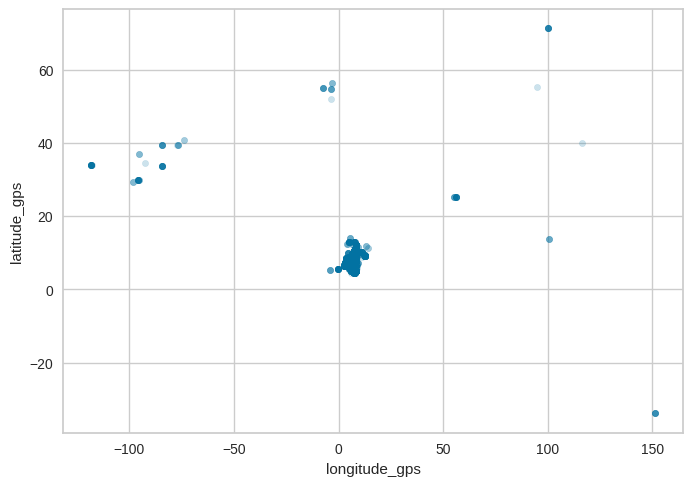

In [910]:
df.plot(kind= "scatter",x= "longitude_gps",y= "latitude_gps",grid= True, alpha = 0.2)
plt.show()

In [911]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13673 entries, 0 to 13692
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customerid                  13673 non-null  object 
 1   birthdate                   13673 non-null  object 
 2   bank_account_type           13673 non-null  object 
 3   longitude_gps               13673 non-null  float64
 4   latitude_gps                13673 non-null  float64
 5   bank_name_clients           13673 non-null  object 
 6   bank_branch_clients         104 non-null    object 
 7   employment_status_clients   12310 non-null  object 
 8   level_of_education_clients  3464 non-null   object 
 9   systemloanid_x              13673 non-null  int64  
 10  loannumber_x                13673 non-null  int64  
 11  approveddate_x              13673 non-null  object 
 12  creationdate_x              13673 non-null  object 
 13  loanamount_x                13673 no

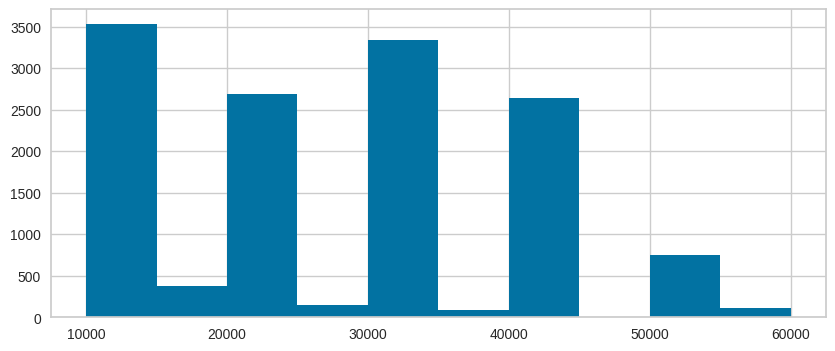

In [912]:

df['loanamount_x'].hist(figsize=(10,4), xlabelsize= 10)
plt.show()

In [913]:
df['loanamount_x'].value_counts()

loanamount_x
10000.0    3534
30000.0    3338
20000.0    2695
40000.0    2636
50000.0     750
15000.0     373
25000.0     149
60000.0     107
35000.0      91
Name: count, dtype: int64

In [914]:
df[['systemloanid_y','employment_status_clients']].value_counts()

systemloanid_y  employment_status_clients
301600134       Self-Employed                1
301890950       Self-Employed                1
301894155       Permanent                    1
301894162       Permanent                    1
301894192       Permanent                    1
                                            ..
301797018       Permanent                    1
301797026       Permanent                    1
301797035       Permanent                    1
301797046       Permanent                    1
301993366       Permanent                    1
Name: count, Length: 12310, dtype: int64

In [915]:
# prompt: remove the _y from the columns ending with a _y and replace it with _prev

df.rename(columns={col: col[:-2] + '_prev' if col.endswith('_y') else col for col in df.columns}, inplace=True)


In [916]:
# prompt: check whether df2['loannumber'] is always greater than or equal to df3['loannumber']. incase it is not always greater, check how many times it is greater than or equal to

is_greater = df['loannumber_x'] > df['loannumber_prev']
always_greater = is_greater.all()
if always_greater:
  print("df2['loannumber'] is always greater than df3['loannumber']")
else:
  greater_count = is_greater.sum()
  print(f"df2['loannumber'] is greater than or equal to df3['loannumber'] {greater_count} times")


df2['loannumber'] is always greater than df3['loannumber']


In [917]:
# prompt: check by how much loannumber_x is greater than loannumber_y on average

df['loan_number_diff'] = df['loannumber_x'] - df['loannumber_prev']
# average_diff = diff.mean()
# print(f"On average, loannumber_x is {average_diff} greater than loannumber_y")


In [918]:
# prompt: check whether loanamount_x  is always equal to loanamount_y

is_equal = df['loanamount_x'] >= df['loanamount_prev']
always_equal = is_equal.all()
if always_equal:
  print("df2['loanamount'] is always equal to df3['loanamount']")
else:
  equal_count = is_equal.sum()
  print(f"df2['loanamount'] is greater or equal to df3['loanamount'] {equal_count} times")


df2['loanamount'] is greater or equal to df3['loanamount'] 13240 times


In [919]:
# prompt: create a new column called same_loan_amount. a cell will have 1 if loanamount_x equals to loanamount_y or else it will have 0.

df['loan_amount_diff'] = df['loanamount_x'] - df['loanamount_prev']


In [920]:
df['loan_amount_diff'].value_counts()

loan_amount_diff
 0.0        5083
 10000.0    4110
 20000.0    2191
 30000.0     825
 5000.0      424
-10000.0     250
 40000.0     185
 15000.0     183
-5000.0      109
 25000.0      94
 50000.0      39
 35000.0      37
-20000.0      35
-15000.0      31
 24000.0      10
 2000.0        7
 22000.0       6
 12000.0       5
 45000.0       5
 32000.0       5
 31000.0       4
-30000.0       4
-25000.0       3
 21000.0       3
 23000.0       3
 33000.0       2
 42000.0       2
 14000.0       2
 17000.0       2
 36000.0       2
 3000.0        2
 46000.0       2
 6000.0        1
-40000.0       1
 1000.0        1
 27000.0       1
 9000.0        1
 43000.0       1
 8000.0        1
 34000.0       1
Name: count, dtype: int64

In [921]:
# prompt: check if termdays_x is equal to termdays_y or how many times it is equal

is_equal = df['termdays_x'] >= df['termdays_prev']
always_equal = is_equal.all()
if always_equal:
  print("df2['termdays'] is always equal to df3['termdays']")
else:
  equal_count = is_equal.sum()
  print(f"df2['termdays'] is greater or equal to df3['termdays'] {equal_count} times")


df2['termdays'] is greater or equal to df3['termdays'] 12838 times


In [922]:
# prompt: create a new column called same_termdays. a cell will have 1 if termdays_x equals to termdays_y or else it will have 0.

df['termdays_diff'] = df['termdays_x'] - df['termdays_prev']

In [923]:

df['termdays_diff'].value_counts()

termdays_diff
 0     8236
 15    2861
 30    1194
-15     515
 45     406
-30     312
 60     107
 75      34
-45       8
Name: count, dtype: int64

In [924]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13673 entries, 0 to 13692
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customerid                  13673 non-null  object 
 1   birthdate                   13673 non-null  object 
 2   bank_account_type           13673 non-null  object 
 3   longitude_gps               13673 non-null  float64
 4   latitude_gps                13673 non-null  float64
 5   bank_name_clients           13673 non-null  object 
 6   bank_branch_clients         104 non-null    object 
 7   employment_status_clients   12310 non-null  object 
 8   level_of_education_clients  3464 non-null   object 
 9   systemloanid_x              13673 non-null  int64  
 10  loannumber_x                13673 non-null  int64  
 11  approveddate_x              13673 non-null  object 
 12  creationdate_x              13673 non-null  object 
 13  loanamount_x                13673 no

In [925]:
# prompt: drop the bank_branch_clients, level_of_education_clients, referredby_y,  referredby_y columns from the dataframe permanently

df.drop(['bank_branch_clients', 'level_of_education_clients', ], axis=1, inplace=True)


In [926]:
# prompt: under the "employment_status_clients" column, replace empty cells ie those with Nan values with "unknown" of string datatype

df['employment_status_clients'].fillna('unknown', inplace=True)


In [927]:
# prompt: use the birthdate  column to calculate the age of each client

import datetime

df['birthdate'] = pd.to_datetime(df['birthdate'])
df['today'] = pd.to_datetime(datetime.date.today())
df['age'] = df['today'].dt.year - df['birthdate'].dt.year


# Drop the temporary 'today' column
df.drop('today', axis=1, inplace=True)


In [928]:
# prompt: drop the birthdate column

df.drop('birthdate', axis=1, inplace=True)


In [929]:
df['age'].head()

0    51
1    38
2    37
3    37
4    37
Name: age, dtype: int32

In [930]:
# prompt: slice the dataframe to the loan_number_x and the systemloanid_y as one dataframe

loan_info_df = df[['loannumber_x', 'systemloanid_prev']]
loan_info_df


,loannumber_x,systemloanid_prev
0,2,301943951
1,2,301929966
2,4,301931228
3,4,301895253
4,4,301919784
...,...,...
13688,7,301633289
13689,7,301918076
13690,7,301824314
13691,7,301874438


<Axes: xlabel='loannumber_x'>

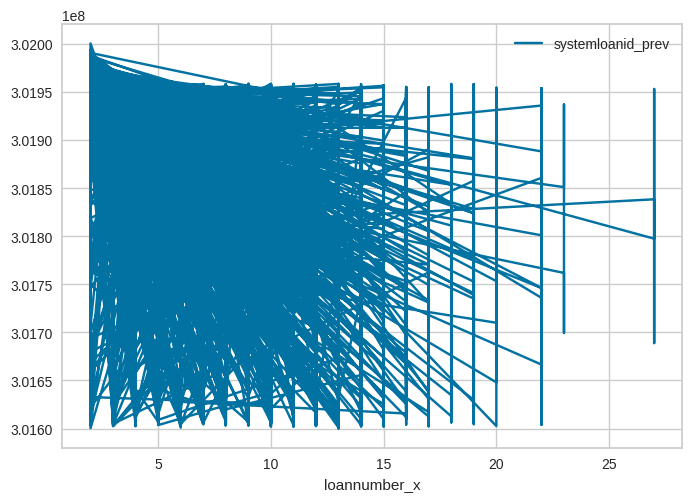

In [931]:
# prompt: draw a line plot loannumber_x' and 'systemloanid_y' columns

loan_info_df.plot.line(x='loannumber_x', y='systemloanid_prev')


In [932]:
# prompt: drop customerid and systemloanid columns

df.drop(columns=['customerid','systemloanid_x',], inplace=True)


In [933]:
# prompt: convert approveddate and creationdate to datetime datatypes

df['approveddate_x'] = pd.to_datetime(df['approveddate_x'])
df['creationdate_x'] = pd.to_datetime(df['creationdate_x'])
df['approveddate_prev'] = pd.to_datetime(df['approveddate_prev'])
df['creationdate_prev'] = pd.to_datetime(df['creationdate_prev'])

In [934]:

# prompt: create a columm that measures the number of months it took to approve the loan. by subracting creationdate_x from approveddate_x

df['loan_approval_duration_x'] = (df['approveddate_x'] - df['creationdate_x'])
df['loan_approval_duration_prev'] = (df['approveddate_prev'] - df['creationdate_prev'])



In [935]:
# prompt: use the loan_approval_duration_x and loan_approval_duration_y columns to extract only the number of hours and convert them to integers

df['loan_approval_duration_x'] = df['loan_approval_duration_x'] / pd.Timedelta('1 day')
df['loan_approval_duration_x'] = df['loan_approval_duration_x'].astype(float)

df['loan_approval_duration_prev'] = df['loan_approval_duration_prev'] / pd.Timedelta('1 day')
df['loan_approval_duration_prev'] = df['loan_approval_duration_prev'].astype(float)


In [936]:
# prompt: check the average difference between loan_approval_duration_x and loan_approval_duration_prev

average_diff = df['loan_approval_duration_x'] - df['loan_approval_duration_prev']
print(f"On average, loan_approval_duration_x is {average_diff.median()} days greater than loan_approval_duration_prev")


On average, loan_approval_duration_x is -1.157407407407357e-05 days greater than loan_approval_duration_prev


In [937]:
df['approval_duration_diff'] = df['loan_approval_duration_x'] - df['loan_approval_duration_prev']

In [938]:
# prompt: drop the approveddate and creationdate columns

df.drop(columns=['approveddate_x', 'creationdate_x', 'approveddate_prev', 'creationdate_prev','loan_approval_duration_x','loan_approval_duration_prev' ], inplace=True)


In [939]:

# prompt: convert firstduedate and firstrepaiddate to datetime datatypes and subtract the former from the latter

df['firstduedate'] = pd.to_datetime(df['firstduedate'])
df['firstrepaiddate'] = pd.to_datetime(df['firstrepaiddate'])
df['delay_duration'] = df['firstrepaiddate'] - df['firstduedate']


In [940]:
# prompt: convert delay duration to hours to days
# . use the float datatype.

df['delay_duration'] = df['delay_duration'] / pd.Timedelta('1 day')
df['delay_duration'] = df['delay_duration'].astype(float)


In [941]:
df['delay_duration'].value_counts()

delay_duration
 0.000000     51
-4.000000     20
-3.000000     18
-2.000000     16
-1.000000     14
              ..
-13.086910     1
 20.614537     1
 0.662940      1
 0.009873      1
-1.735093      1
Name: count, Length: 13364, dtype: int64

In [942]:
# prompt: convert closeddate and creationdate from the df3 dataframe to datetime datatype

df3['closeddate'] = pd.to_datetime(df3['closeddate'])
df3['creationdate'] = pd.to_datetime(df3['creationdate'])


In [943]:
# prompt: create a loan duration column in the df dataframe using closeddate and creationdate from the df3 dataframe

df['actual_loan_duration'] = df3['closeddate'] - df3['creationdate']


In [944]:
# prompt: convert the actual_loan_duration to days and convert the hours to days. use the float datatype

df['actual_loan_duration'] = df['actual_loan_duration'] / pd.Timedelta('1 day')
df['actual_loan_duration'] = df['actual_loan_duration'].astype(float)


In [945]:
df['actual_loan_duration'].value_counts()

actual_loan_duration
28.865521    2
31.269167    2
23.079745    2
27.902639    2
26.280139    2
            ..
29.295451    1
22.909271    1
22.082187    1
25.739479    1
16.470289    1
Name: count, Length: 13642, dtype: int64

In [946]:
# prompt: check whether  actual_loan_duration is always greater than termdays_x

is_greater = df['actual_loan_duration'] > df['termdays_x']
always_greater = is_greater.all()

if always_greater:
    print("actual_loan_duration is always greater than termdays_x")
else:
    greater_count = is_greater.sum()
    print(f"actual_loan_duration is greater than termdays_x {greater_count/len(df) * 100} times")


actual_loan_duration is greater than termdays_x 27.360491479558252 times


In [947]:
df['defaulted_days'] = df['termdays_x'] - df['actual_loan_duration']

In [948]:
df['defaulted_days'].head()

0    13.052593
1     0.120880
2   -22.515706
3    15.659606
4     2.466053
Name: defaulted_days, dtype: float64

In [949]:
df['defaulted_days'] = df['defaulted_days'].astype(float)

In [950]:
# prompt: drop closeddate, firstduedate, firstrepaiddate

df.drop(columns=['closeddate', 'firstduedate', 'firstrepaiddate'], inplace=True)


In [951]:
df['employment_status_clients'].value_counts()

employment_status_clients
Permanent        9118
Self-Employed    2319
unknown          1363
Student           615
Unemployed        219
Retired            29
Contract           10
Name: count, dtype: int64

In [952]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder


# Define the order of categories (most to least viable)
categories = [["Permanent", "Self-Employed", "Contract", "Retired", "Student", "Unemployed", "unknown"]]

# Create the OrdinalEncoder object
encoder = OrdinalEncoder(categories=categories)

# Encode the employment status column
df['employment_status_clients'] = encoder.fit_transform(df[['employment_status_clients']])


In [953]:
df['employment_status_clients'].value_counts()

employment_status_clients
0.0    9118
1.0    2319
6.0    1363
4.0     615
5.0     219
3.0      29
2.0      10
Name: count, dtype: int64

In [954]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13673 entries, 0 to 13692
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   bank_account_type          13673 non-null  object 
 1   longitude_gps              13673 non-null  float64
 2   latitude_gps               13673 non-null  float64
 3   bank_name_clients          13673 non-null  object 
 4   employment_status_clients  13673 non-null  float64
 5   loannumber_x               13673 non-null  int64  
 6   loanamount_x               13673 non-null  float64
 7   totaldue_x                 13673 non-null  float64
 8   termdays_x                 13673 non-null  int64  
 9   referredby_x               800 non-null    object 
 10  good_bad_flag              13673 non-null  object 
 11  systemloanid_prev          13673 non-null  int64  
 12  loannumber_prev            13673 non-null  int64  
 13  loanamount_prev            13673 non-null  float64


In [955]:
# prompt: for refferedby_x and refferedby_y columns, replace empty cells with zero and the contents of the other cells with 1

df['referredby_x'].fillna(0, inplace=True)
df['referredby_prev'].fillna(0, inplace=True)
df.loc[df['referredby_x'] != 0, 'referredby_x'] = 1
df.loc[df['referredby_prev'] != 0, 'referredby_prev'] = 1


In [956]:
# prompt: checked whether referredby_x is always equal to referredby_y

is_equal = df['referredby_x'] == df['referredby_prev']
always_equal = is_equal.all()
if always_equal:
  print("df2['referredby'] is always equal to df3['referredby']")
else:
  equal_count = is_equal.sum()
  print(f"df2['referredby'] is equal to df3['referredby'] {equal_count} times")


df2['referredby'] is always equal to df3['referredby']


In [957]:
# prompt: drop referredby_y

df.drop('referredby_prev', axis=1, inplace=True)


In [958]:
# prompt: change referredby_x to integer

df['referredby_x'] = df['referredby_x'].astype('int')


In [959]:
df['referredby_x'].value_counts()

referredby_x
0    12873
1      800
Name: count, dtype: int64

In [960]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder


# Define the order of categories (most to least viable)
categories = [['Good', 'Bad']]

# Create the OrdinalEncoder object
encoder = OrdinalEncoder(categories=categories)

# Encode the employment status column
df['good_bad_flag'] = encoder.fit_transform(df[['good_bad_flag']])

# # Initialize LabelEncoders
# label_encoder_acc_type = LabelEncoder()
# label_encoder_bank_name = LabelEncoder()

# # Fit and transform each column separately
# df['bank_account_type'] = label_encoder_acc_type.fit_transform(df[['bank_account_type']])
# df['bank_name_clients'] = label_encoder_bank_name.fit_transform(df[['bank_name_clients']])


In [961]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13673 entries, 0 to 13692
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   bank_account_type          13673 non-null  object 
 1   longitude_gps              13673 non-null  float64
 2   latitude_gps               13673 non-null  float64
 3   bank_name_clients          13673 non-null  object 
 4   employment_status_clients  13673 non-null  float64
 5   loannumber_x               13673 non-null  int64  
 6   loanamount_x               13673 non-null  float64
 7   totaldue_x                 13673 non-null  float64
 8   termdays_x                 13673 non-null  int64  
 9   referredby_x               13673 non-null  int64  
 10  good_bad_flag              13673 non-null  float64
 11  systemloanid_prev          13673 non-null  int64  
 12  loannumber_prev            13673 non-null  int64  
 13  loanamount_prev            13673 non-null  float64


In [962]:
!pip install sklearn.preprocessing

from sklearn.preprocessing import TargetEncoder


T_encoder = TargetEncoder(categories='auto', target_type='binary', smooth='auto', cv=5, shuffle=True, random_state=42)

# Fit and transform the data
df_encoded = T_encoder.fit_transform(df[['bank_account_type', 'bank_name_clients',]], df['good_bad_flag'])

# Join the encoded columns back to the original DataFrame
# df = pd.concat([df.drop(['bank_account_type', 'bank_name_clients'], axis=1), df_encoded], axis=1)

df_encoded = pd.DataFrame(df_encoded, columns= ['bank_account_type_enc', 'bank_name_clients_enc',])
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13673 entries, 0 to 13672
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   bank_account_type_enc  13673 non-null  float64
 1   bank_name_clients_enc  13673 non-null  float64
dtypes: float64(2)
memory usage: 213.8 KB


In [963]:
!pip show sklearn.preprocessing


Name: sklearn-preprocessing
Version: 0.1.0
Summary: 
Home-page: 
Author: 
Author-email: 
License: 
Location: /usr/local/lib/python3.10/dist-packages
Requires: 
Required-by: 


In [964]:
!pip show sklearn.preprocessing

Name: sklearn-preprocessing
Version: 0.1.0
Summary: 
Home-page: 
Author: 
Author-email: 
License: 
Location: /usr/local/lib/python3.10/dist-packages
Requires: 
Required-by: 


In [965]:
df["bank_account_type_enc"] = df_encoded["bank_account_type_enc"]
df["bank_name_clients_enc"] = df_encoded["bank_name_clients_enc"]


In [966]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13673 entries, 0 to 13692
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   bank_account_type          13673 non-null  object 
 1   longitude_gps              13673 non-null  float64
 2   latitude_gps               13673 non-null  float64
 3   bank_name_clients          13673 non-null  object 
 4   employment_status_clients  13673 non-null  float64
 5   loannumber_x               13673 non-null  int64  
 6   loanamount_x               13673 non-null  float64
 7   totaldue_x                 13673 non-null  float64
 8   termdays_x                 13673 non-null  int64  
 9   referredby_x               13673 non-null  int64  
 10  good_bad_flag              13673 non-null  float64
 11  systemloanid_prev          13673 non-null  int64  
 12  loannumber_prev            13673 non-null  int64  
 13  loanamount_prev            13673 non-null  float64


In [967]:
df['good_bad_flag'].isnull().sum()


0

In [968]:
df.drop(columns= ['bank_account_type', "bank_name_clients",], inplace = True)

In [969]:
# # prompt: use one-hot encoding on bank_account_type and bank_name_clients columns

# df = pd.get_dummies(df, columns=['bank_account_type', 'bank_name_clients'])


In [970]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13673 entries, 0 to 13692
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   longitude_gps              13673 non-null  float64
 1   latitude_gps               13673 non-null  float64
 2   employment_status_clients  13673 non-null  float64
 3   loannumber_x               13673 non-null  int64  
 4   loanamount_x               13673 non-null  float64
 5   totaldue_x                 13673 non-null  float64
 6   termdays_x                 13673 non-null  int64  
 7   referredby_x               13673 non-null  int64  
 8   good_bad_flag              13673 non-null  float64
 9   systemloanid_prev          13673 non-null  int64  
 10  loannumber_prev            13673 non-null  int64  
 11  loanamount_prev            13673 non-null  float64
 12  totaldue_prev              13673 non-null  float64
 13  termdays_prev              13673 non-null  int64  


In [971]:
df['good_bad_flag'].value_counts()

good_bad_flag
0.0    11146
1.0     2527
Name: count, dtype: int64

In [972]:
df.dropna(inplace= True)

In [973]:
# import matplotlib.pyplot as plt

# df.hist(figsize=(12,8), xlabelsize= 4)
# plt.show()

# Down-sample the target class

In [73]:
# # Separate majority and minority classes
# df_majority = df[df['good_bad_flag'] == 0.0]
# df_minority = df[df['good_bad_flag'] == 1.0]

# # Downsample majority class
# df_majority_downsampled = df_majority.sample(n=len(df_minority), random_state=42)

# # Combine minority class with downsampled majority class
# df_balanced = pd.concat([df_majority_downsampled, df_minority])

# # Shuffle the dataset to mix rows
# df_balanced = df_balanced.sample(frac=1, random_state=42)

# # Optional: Check the new class distribution
# print(df_balanced['good_bad_flag'].value_counts())


In [74]:
# # Check for conflicting variable
# if '_MissingValues' in globals():
#     del globals()['_MissingValues']  # Remove the conflicting variable

In [75]:
# df_balanced.info()

In [76]:
# df_balanced['referredby_x'].value_counts()

In [77]:
# df_balanced.drop('referredby_x', axis = 1, inplace= True)

In [78]:
# # prompt: check for percentage of missing values
# #
# df_balanced.isnull().mean() * 100


# Up-sample the target class

In [974]:
!pip install -U imbalanced-learn

In [975]:
df['termdays_prev'].value_counts()

termdays_prev
30    8304
15    4567
60     759
90      23
Name: count, dtype: int64

In [976]:
# prompt: use smote to balance the data points for the 2 categories column
import pandas as pd

from imblearn.over_sampling import SMOTENC, SMOTE, RandomOverSampler

# categorical = ['employment_status_clients','bank_account_type_enc','bank_name_clients_enc',]
# smote_nc = SMOTENC(categorical_features=categorical, random_state=42)
smote_nc = SMOTE(random_state=42)
random_os = RandomOverSampler(random_state= 42, shrinkage= 1)

if df.empty:
    raise ValueError("DataFrame is empty. Cannot apply SMOTE.")


X = df.drop('good_bad_flag', axis=1)

y = df['good_bad_flag']

# sm = SMOTE(random_state=42)

X_train, y_train = random_os.fit_resample(X, y,)

df_balanced = pd.concat([X_train, y_train], axis=1)

df_balanced['good_bad_flag'].value_counts()


good_bad_flag
0.0    11127
1.0    11127
Name: count, dtype: int64

In [977]:
# # /mnt/data/balance_data.py

# !pip uninstall -y imblearn scikit-learn
# !pip install imblearn==0.8.0 scikit-learn==0.24.2

# import pandas as pd
# from imblearn.over_sampling import SMOTENC

# categorical = ['employment_status_clients','bank_account_type_enc','bank_name_clients_enc', 'loanamount_x', 'loanamount_prev', 'totaldue_x', 'totaldue_prev']
# smote_nc = SMOTENC(categorical_features=categorical, random_state=42)

# # Example DataFrame (replace this with your actual DataFrame)
# # df = pd.read_csv('your_dataset.csv')

# # Check if DataFrame is empty
# if df.empty:
#     raise ValueError("DataFrame is empty. Cannot apply SMOTE.")

# # Separate features and target variable
# X = df.drop('good_bad_flag', axis=1)
# y = df['good_bad_flag']

# # Apply SMOTE
# sm = SMOTE(random_state=42)
# X_train, y_train = sm.fit_resample(X, y)

# # Combine balanced data into a DataFrame
# df_balanced = pd.concat([pd.DataFrame(X_train, columns=X.columns), pd.DataFrame(y_train, columns=['good_bad_flag'])], axis=1)

# # Display the balanced class distribution
# print(df_balanced['good_bad_flag'].value_counts())


In [978]:
# Check for conflicting variable
if '_MissingValues' in globals():
    del globals()['_MissingValues']  # Remove the conflicting variable

In [979]:
df_balanced['referredby_x'].value_counts()

referredby_x
0    21128
1     1126
Name: count, dtype: int64

In [980]:
df_balanced.drop('referredby_x', axis = 1, inplace= True)

In [981]:
# prompt: install pandas profiling package

# !pip install pandas-profiling


In [982]:
# from ydata_profiling import ProfileReport
# profile = ProfileReport(df_balanced, title="Profiling Report")
# profile

In [983]:
# prompt: check for percentage of missing values

df_balanced.isnull().mean() * 100


longitude_gps                0.0
latitude_gps                 0.0
employment_status_clients    0.0
loannumber_x                 0.0
loanamount_x                 0.0
totaldue_x                   0.0
termdays_x                   0.0
systemloanid_prev            0.0
loannumber_prev              0.0
loanamount_prev              0.0
totaldue_prev                0.0
termdays_prev                0.0
loan_number_diff             0.0
loan_amount_diff             0.0
termdays_diff                0.0
age                          0.0
approval_duration_diff       0.0
delay_duration               0.0
actual_loan_duration         0.0
defaulted_days               0.0
bank_account_type_enc        0.0
bank_name_clients_enc        0.0
good_bad_flag                0.0
dtype: float64

In [984]:
import numpy as np
df_balanced["loanamount_cat"] = pd.cut(df_balanced["loanamount_x"],
                              bins = [-np.inf,10000,20000,30000,40000,np.inf],
                              labels = [1,2,3,4,5])

In [985]:
df_balanced['loanamount_cat'].isnull().sum()

0

# Scaling train data and PCA

In [1050]:
# # prompt: scale the df_balanced dataframe  using the minmax scaler without removing or scaling the target column

# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler(feature_range=(0, 1))

# # Scale the data without the target column
# X_train = df_balanced.drop('good_bad_flag', axis= 1)

# df_balanced_scaled = scaler.fit_transform(df_balanced)

# # Add the target column back to the dataframe
# df_balanced_scaled = pd.DataFrame(data=df_balanced_scaled, columns= df_balanced.columns)
# df_balanced_scaled.head()


In [1051]:
# prompt: scale data using standard scaler

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Scale the data without the target column
X_train = df_balanced.drop('good_bad_flag', axis= 1)

df_balanced_scaled = scaler.fit_transform(df_balanced)

# Add the target column back to the dataframe
df_balanced_scaled = pd.DataFrame(data=df_balanced_scaled, columns= df_balanced.columns)
df_balanced_scaled.head()


,longitude_gps,latitude_gps,employment_status_clients,loannumber_x,loanamount_x,totaldue_x,termdays_x,systemloanid_prev,loannumber_prev,loanamount_prev,...,termdays_diff,age,approval_duration_diff,delay_duration,actual_loan_duration,defaulted_days,bank_account_type_enc,bank_name_clients_enc,good_bad_flag,loanamount_cat
0,-0.154682,-0.209629,2.146953,-1.286606,-1.070393,-1.04208,-0.181894,1.025997,-0.856662,-0.624278,...,0.539058,1.762658,0.009542,0.036351,-0.501820,0.192699,0.710907,-0.098601,-1.0,-1.290862
1,-0.153918,-0.053018,-0.506968,-1.286606,-1.070393,-1.04208,-0.181894,0.886150,-0.856662,-0.624278,...,-0.428549,-0.212279,0.009331,0.291525,0.403963,-0.412170,0.720321,2.778215,1.0,-1.290862
2,0.136065,-0.465549,2.146953,-0.855470,-1.070393,-1.04208,-0.181894,0.898770,-0.271270,-0.624278,...,-0.428549,-0.364197,0.022589,0.154179,1.989509,-1.470975,0.733442,0.344324,-1.0,-1.290862
3,0.136065,-0.465549,2.146953,-0.855470,-1.070393,-1.04208,-0.181894,0.539028,-0.856662,-0.624278,...,0.539058,-0.364197,0.019643,0.374407,-0.684424,0.314639,0.710907,0.837832,-1.0,-1.290862
4,0.136065,-0.465549,2.146953,-0.855470,-1.070393,-1.04208,-0.181894,0.784332,-0.563966,-0.624278,...,0.539058,-0.364197,0.022589,-0.195910,0.239698,-0.302477,0.753841,0.801904,-1.0,-1.290862


In [1052]:
df_balanced_scaled.isnull().sum()

longitude_gps                0
latitude_gps                 0
employment_status_clients    0
loannumber_x                 0
loanamount_x                 0
totaldue_x                   0
termdays_x                   0
systemloanid_prev            0
loannumber_prev              0
loanamount_prev              0
totaldue_prev                0
termdays_prev                0
loan_number_diff             0
loan_amount_diff             0
termdays_diff                0
age                          0
approval_duration_diff       0
delay_duration               0
actual_loan_duration         0
defaulted_days               0
bank_account_type_enc        0
bank_name_clients_enc        0
good_bad_flag                0
loanamount_cat               0
dtype: int64

In [1053]:
df_balanced_scaled['good_bad_flag'].value_counts()

good_bad_flag
-1.0    11127
 1.0    11127
Name: count, dtype: int64

In [1054]:
# prompt: create a new feature from loanamount and totaldue using the concept of PCA

from sklearn.decomposition import PCA

pca = PCA(n_components=1)
df_balanced_scaled['loanamount_totaldue_pca_x'] = pca.fit_transform(df_balanced_scaled[['loanamount_x', 'totaldue_x']])
df_balanced_scaled['loanamount_totaldue_pca_prev'] = pca.fit_transform(df_balanced_scaled[['loanamount_prev', 'totaldue_prev']])

df_balanced_scaled.head()


,longitude_gps,latitude_gps,employment_status_clients,loannumber_x,loanamount_x,totaldue_x,termdays_x,systemloanid_prev,loannumber_prev,loanamount_prev,...,approval_duration_diff,delay_duration,actual_loan_duration,defaulted_days,bank_account_type_enc,bank_name_clients_enc,good_bad_flag,loanamount_cat,loanamount_totaldue_pca_x,loanamount_totaldue_pca_prev
0,-0.154682,-0.209629,2.146953,-1.286606,-1.070393,-1.04208,-0.181894,1.025997,-0.856662,-0.624278,...,0.009542,0.036351,-0.501820,0.192699,0.710907,-0.098601,-1.0,-1.290862,-1.493744,-0.930539
1,-0.153918,-0.053018,-0.506968,-1.286606,-1.070393,-1.04208,-0.181894,0.886150,-0.856662,-0.624278,...,0.009331,0.291525,0.403963,-0.412170,0.720321,2.778215,1.0,-1.290862,-1.493744,-0.833501
2,0.136065,-0.465549,2.146953,-0.855470,-1.070393,-1.04208,-0.181894,0.898770,-0.271270,-0.624278,...,0.022589,0.154179,1.989509,-1.470975,0.733442,0.344324,-1.0,-1.290862,-1.493744,-0.833501
3,0.136065,-0.465549,2.146953,-0.855470,-1.070393,-1.04208,-0.181894,0.539028,-0.856662,-0.624278,...,0.019643,0.374407,-0.684424,0.314639,0.710907,0.837832,-1.0,-1.290862,-1.493744,-0.930539
4,0.136065,-0.465549,2.146953,-0.855470,-1.070393,-1.04208,-0.181894,0.784332,-0.563966,-0.624278,...,0.022589,-0.195910,0.239698,-0.302477,0.753841,0.801904,-1.0,-1.290862,-1.493744,-0.930539


In [1055]:
# prompt: drop loanamount and totaldue columns

df_balanced_scaled.drop(columns=['loanamount_x','loanamount_prev', 'totaldue_x', 'totaldue_prev',], inplace=True)


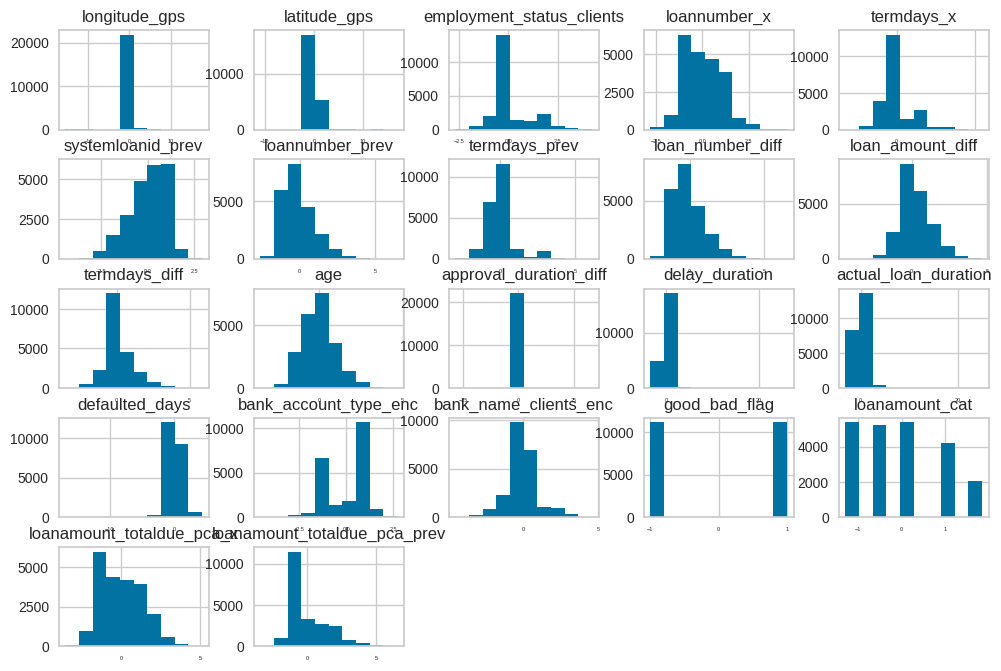

In [1056]:
import matplotlib.pyplot as plt

df_balanced_scaled.hist(figsize=(12,8), xlabelsize= 4)
plt.show()

In [1057]:
# import numpy as np
# import pandas as pd

# # Define the list of columns for log transformation, ensuring no duplicates
# log_cols = [
#    'bank_account_type_enc', 'actual_loan_duration', 'delay_duration',
#     'employment_status_clients', 'loannumber_prev','loannumber_x', 'termdays_x',
#     'termdays_prev','latitude_gps', 'longitude_gps', 'loan_number_diff', 'approval_duration_diff',
#    'loanamount_totaldue_pca_x', 'loanamount_totaldue_pca_prev'
# ]

# # list of columns with negative values



# # Ensure that all columns in log_cols exist in the DataFrame
# existing_log_cols = [col for col in log_cols if col in df_balanced_scaled.columns]


# # non_positive_counts = (df_balanced_scaled[existing_log_cols] <= 0).sum()
# # if non_positive_counts.any():
# #     print("Non-positive values found in columns:")
# #     print(non_positive_counts[non_positive_counts > 0])
# #     # Decide how to handle non-positive values
# #     # For now, let's replace any remaining non-positive values with a small number
# #     df_balanced_scaled[existing_log_cols] = df_balanced_scaled[existing_log_cols].clip(lower=1e-6)


# # Replace 0 values with a small number (1e-6) to avoid log(0)
# # df_balanced_scaled[existing_log_cols] = df_balanced_scaled[existing_log_cols].replace(0, 1e-6)

# # Apply log transformation to the specified columns
# for col in existing_log_cols:
#     df_balanced_scaled[col] = df_balanced_scaled[col].apply(lambda x: np.sign(x) * np.log(np.abs(x) + 1))


In [1058]:
df_balanced_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22254 entries, 0 to 22253
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   longitude_gps                 22254 non-null  float64
 1   latitude_gps                  22254 non-null  float64
 2   employment_status_clients     22254 non-null  float64
 3   loannumber_x                  22254 non-null  float64
 4   termdays_x                    22254 non-null  float64
 5   systemloanid_prev             22254 non-null  float64
 6   loannumber_prev               22254 non-null  float64
 7   termdays_prev                 22254 non-null  float64
 8   loan_number_diff              22254 non-null  float64
 9   loan_amount_diff              22254 non-null  float64
 10  termdays_diff                 22254 non-null  float64
 11  age                           22254 non-null  float64
 12  approval_duration_diff        22254 non-null  float64
 13  d

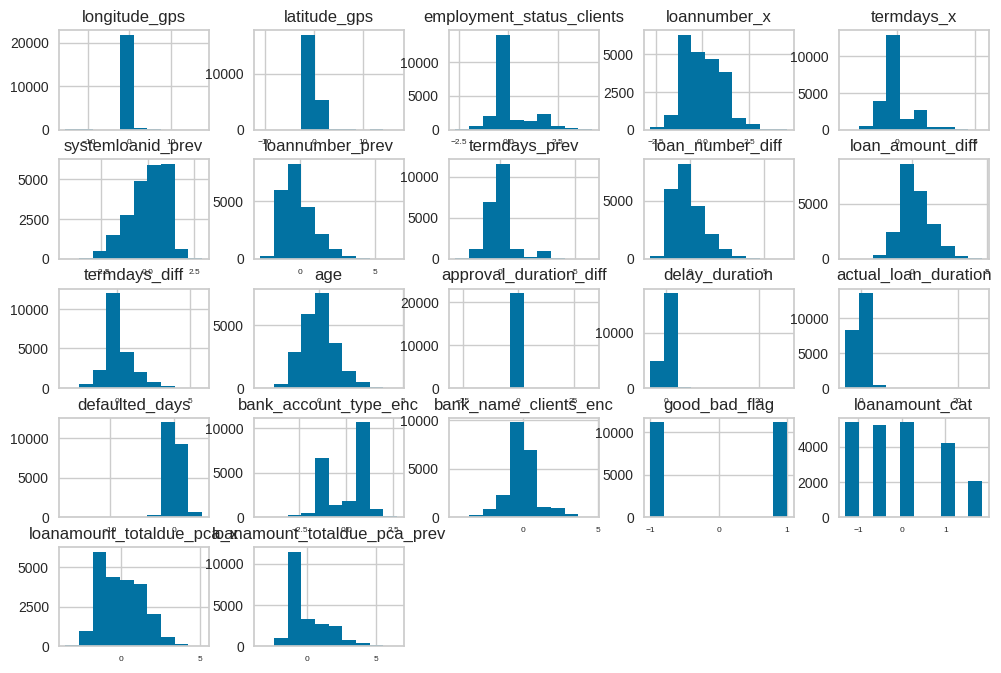

In [1059]:
import matplotlib.pyplot as plt

df_balanced_scaled.hist(figsize=(12,8), xlabelsize= 6)
plt.show()

In [1060]:
# prompt: use pandas profiling package to do  eda

# from ydata_profiling import ProfileReport
# profile = ProfileReport(df_balanced_scaled, title="Profiling Report")
# profile


In [1061]:
df_balanced_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22254 entries, 0 to 22253
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   longitude_gps                 22254 non-null  float64
 1   latitude_gps                  22254 non-null  float64
 2   employment_status_clients     22254 non-null  float64
 3   loannumber_x                  22254 non-null  float64
 4   termdays_x                    22254 non-null  float64
 5   systemloanid_prev             22254 non-null  float64
 6   loannumber_prev               22254 non-null  float64
 7   termdays_prev                 22254 non-null  float64
 8   loan_number_diff              22254 non-null  float64
 9   loan_amount_diff              22254 non-null  float64
 10  termdays_diff                 22254 non-null  float64
 11  age                           22254 non-null  float64
 12  approval_duration_diff        22254 non-null  float64
 13  d

In [1062]:
df_balanced_scaled.isnull().sum()

longitude_gps                   0
latitude_gps                    0
employment_status_clients       0
loannumber_x                    0
termdays_x                      0
systemloanid_prev               0
loannumber_prev                 0
termdays_prev                   0
loan_number_diff                0
loan_amount_diff                0
termdays_diff                   0
age                             0
approval_duration_diff          0
delay_duration                  0
actual_loan_duration            0
defaulted_days                  0
bank_account_type_enc           0
bank_name_clients_enc           0
good_bad_flag                   0
loanamount_cat                  0
loanamount_totaldue_pca_x       0
loanamount_totaldue_pca_prev    0
dtype: int64

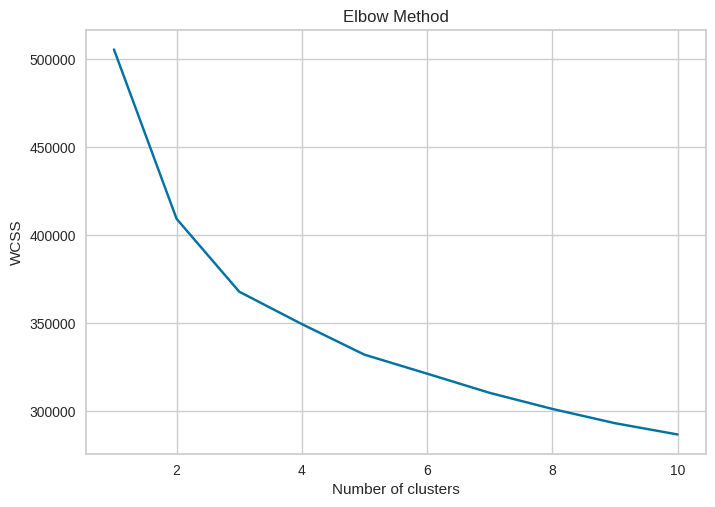

In [1063]:
# prompt: use k-means and elbow method to cluster the data
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, n_init=10, random_state=0)
    kmeans.fit(df_balanced_scaled.drop(columns= ['good_bad_flag']))
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


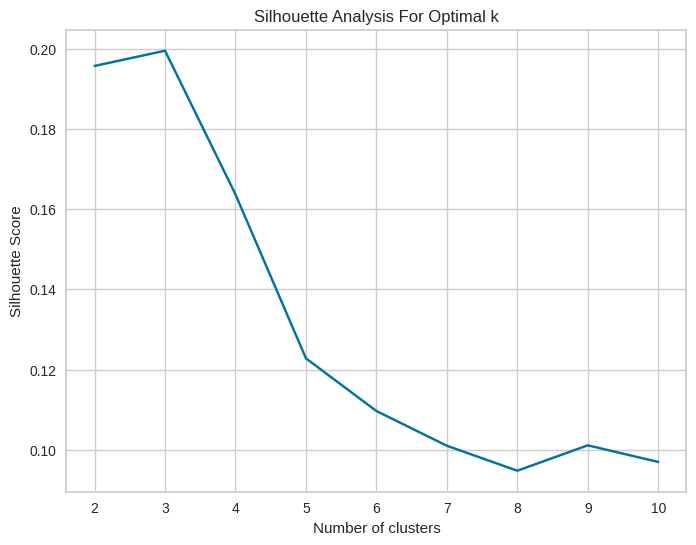

In [1064]:
from sklearn.metrics import silhouette_score

def plot_silhouette_analysis(data):
    silhouette_scores = []
    K = range(2, 11)  # Silhouette score requires at least 2 clusters
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42).fit(data)
        score = silhouette_score(data, kmeans.labels_)
        silhouette_scores.append(score)

    plt.figure(figsize=(8, 6))
    plt.plot(K, silhouette_scores, 'bx-')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Analysis For Optimal k')
    plt.show()

# Assuming X_scaled is your scaled feature data
plot_silhouette_analysis(df_balanced_scaled.drop(columns= ['good_bad_flag']))


In [1065]:
# prompt: split the data into different clusters. the optimal value for k is 3

kmeans = KMeans(n_clusters=3, n_init=10, random_state=0)
df_balanced_scaled['cluster'] = kmeans.fit_predict(df_balanced_scaled)
df_balanced_scaled.head()


,longitude_gps,latitude_gps,employment_status_clients,loannumber_x,termdays_x,systemloanid_prev,loannumber_prev,termdays_prev,loan_number_diff,loan_amount_diff,...,delay_duration,actual_loan_duration,defaulted_days,bank_account_type_enc,bank_name_clients_enc,good_bad_flag,loanamount_cat,loanamount_totaldue_pca_x,loanamount_totaldue_pca_prev,cluster
0,-0.154682,-0.209629,2.146953,-1.286606,-0.181894,1.025997,-0.856662,-0.977677,-0.856824,-0.773449,...,0.036351,-0.501820,0.192699,0.710907,-0.098601,-1.0,-1.290862,-1.493744,-0.930539,2
1,-0.153918,-0.053018,-0.506968,-1.286606,-0.181894,0.886150,-0.856662,0.317802,-0.856824,-0.773449,...,0.291525,0.403963,-0.412170,0.720321,2.778215,1.0,-1.290862,-1.493744,-0.833501,2
2,0.136065,-0.465549,2.146953,-0.855470,-0.181894,0.898770,-0.271270,0.317802,-0.856824,-0.773449,...,0.154179,1.989509,-1.470975,0.733442,0.344324,-1.0,-1.290862,-1.493744,-0.833501,2
3,0.136065,-0.465549,2.146953,-0.855470,-0.181894,0.539028,-0.856662,-0.977677,-0.268975,-0.773449,...,0.374407,-0.684424,0.314639,0.710907,0.837832,-1.0,-1.290862,-1.493744,-0.930539,2
4,0.136065,-0.465549,2.146953,-0.855470,-0.181894,0.784332,-0.563966,-0.977677,-0.562899,-0.773449,...,-0.195910,0.239698,-0.302477,0.753841,0.801904,-1.0,-1.290862,-1.493744,-0.930539,2


In [1066]:
# # prompt: plot the 3 clusters using different  combination of all the columns
# #  using  a scatter plot

# import seaborn as sns

# # Create a scatter plot for each pair of columns
# for i in range(len(df_balanced_scaled.columns)):
#     for j in range(i + 1, len(df_balanced_scaled.columns)):
#         sns.scatterplot(x=df_balanced_scaled.iloc[:, i], y=df_balanced_scaled.iloc[:, j], hue=df_balanced_scaled['cluster'])
#         plt.show()


In [1067]:
# prompt: create 3 dataframe each for a different cluster and 3 csv files

df1 = df_balanced_scaled[df_balanced_scaled['cluster'] == 0]
df2 = df_balanced_scaled[df_balanced_scaled['cluster'] == 1]
df3 = df_balanced_scaled[df_balanced_scaled['cluster'] == 2]

df1.to_csv('cluster1.csv', index=False)
df2.to_csv('cluster2.csv', index=False)
df3.to_csv('cluster3.csv', index=False)


In [1068]:
df_balanced_scaled[["cluster"]].value_counts() / len(df_balanced_scaled) * 100

cluster
2          52.529882
1          27.060304
0          20.409814
Name: count, dtype: float64

# Choosing the best model for each cluster

# Model selection for Cluster 1

In [1069]:
# !pip install pycaret
# !pip install scikit-learn==0.20.0


In [1070]:
import pandas as pd

cluster_1 = pd.read_csv("/content/cluster1.csv")

In [1071]:
# prompt: drop the cluster column

# cluster_1.drop(columns=['termdays_x','termdays_prev', 'termdays_diff'], axis=1, inplace=True)


In [1072]:
from pycaret.classification import *

assign = setup(data = cluster_1, target = 'good_bad_flag', session_id=42)

from sklearn.metrics import log_loss
add_metric('logloss', 'Log Loss', log_loss, greater_is_better = False)

,Description,Value
0,Session id,42
1,Target,good_bad_flag
2,Target type,Binary
3,Target mapping,"-1.0: 0, 1.0: 1"
4,Original data shape,"(4542, 23)"
5,Transformed data shape,"(4542, 23)"
6,Transformed train set shape,"(3179, 23)"
7,Transformed test set shape,"(1363, 23)"
8,Numeric features,22
9,Preprocess,True


Name                                                          Log Loss
Display Name                                                  Log Loss
Score Function       <pycaret.internal.metrics.EncodedDecodedLabels...
Scorer               make_scorer(log_loss, greater_is_better=False,...
Target                                                            pred
Args                                                                {}
Greater is Better                                                False
Multiclass                                                        True
Custom                                                            True
Name: logloss, dtype: object

In [1073]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Log Loss,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9550,0.9853,0.9550,0.9567,0.9547,0.9068,0.9090,0.7171,0.3050
lightgbm,Light Gradient Boosting Machine,0.9544,0.9874,0.9544,0.9565,0.9540,0.9054,0.9081,0.7271,0.8380
rf,Random Forest Classifier,0.9248,0.9753,0.9248,0.9321,0.9236,0.8423,0.8515,1.1985,0.8670
et,Extra Trees Classifier,0.9232,0.9659,0.9232,0.9296,0.9220,0.8392,0.8474,1.2236,0.5350
gbc,Gradient Boosting Classifier,0.9160,0.9642,0.9160,0.9230,0.9146,0.8239,0.8330,1.3390,1.6700
dt,Decision Tree Classifier,0.9015,0.9002,0.9015,0.9023,0.9016,0.7987,0.7992,1.5697,0.0720
ada,Ada Boost Classifier,0.9015,0.9433,0.9015,0.9082,0.8999,0.7935,0.8026,1.5696,0.3320
lr,Logistic Regression,0.7106,0.6964,0.7106,0.7164,0.6971,0.3789,0.3981,4.6136,0.5480
ridge,Ridge Classifier,0.7065,0.6973,0.7065,0.7130,0.6916,0.3683,0.3893,4.6788,0.0730
lda,Linear Discriminant Analysis,0.7065,0.6974,0.7065,0.7127,0.6920,0.3689,0.3892,4.6788,0.0430


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [1074]:
best_model_1 = create_model(best)
# best_model_1 = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Log Loss
Fold,,,,,,,,
0,0.9465,0.9740,0.9465,0.9499,0.9460,0.8887,0.8930,0.8523
1,0.9560,0.9832,0.9560,0.9591,0.9556,0.9084,0.9123,0.7019
2,0.9748,0.9921,0.9748,0.9754,0.9748,0.9481,0.9488,0.4011
3,0.9528,0.9921,0.9528,0.9546,0.9525,0.9022,0.9045,0.7520
4,0.9497,0.9799,0.9497,0.9510,0.9494,0.8958,0.8977,0.8021
5,0.9434,0.9844,0.9434,0.9441,0.9431,0.8830,0.8842,0.9024
6,0.9591,0.9888,0.9591,0.9603,0.9589,0.9154,0.9170,0.6517
7,0.9591,0.9918,0.9591,0.9610,0.9588,0.9152,0.9176,0.6517
8,0.9434,0.9730,0.9434,0.9462,0.9429,0.8826,0.8863,0.9024


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

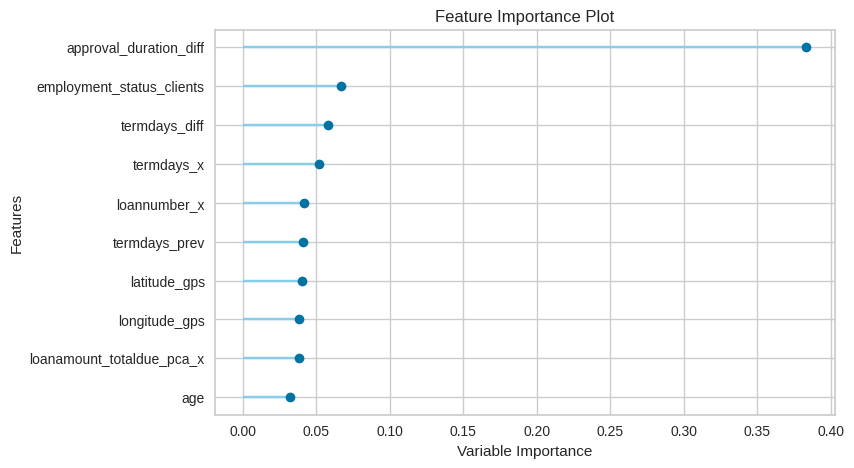

In [1075]:
plot_model(best_model_1, plot = 'feature')
# plot_model(lightgbm, plot = 'feature')


In [1076]:
# define tuning grid
dt_grid = {'max_depth' : [None, 2, 4, 6, 8, 10, 12,15,18,21]}

# tune model with custom grid and metric = logloss
best_model_1 = tune_model(best_model_1, custom_grid = dt_grid, optimize = 'logloss',fold=10, n_iter=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Log Loss
Fold,,,,,,,,
0,0.9623,0.9764,0.9623,0.9638,0.9620,0.9218,0.9238,0.6016
1,0.9623,0.9869,0.9623,0.9646,0.9620,0.9217,0.9245,0.6016
2,0.9623,0.9894,0.9623,0.9638,0.9620,0.9218,0.9238,0.6016
3,0.9560,0.9888,0.9560,0.9582,0.9556,0.9086,0.9114,0.7019
4,0.9528,0.9839,0.9528,0.9546,0.9525,0.9022,0.9045,0.7520
5,0.9623,0.9882,0.9623,0.9638,0.9620,0.9218,0.9238,0.6016
6,0.9591,0.9898,0.9591,0.9610,0.9588,0.9152,0.9176,0.6517
7,0.9528,0.9875,0.9528,0.9539,0.9526,0.9024,0.9039,0.7520
8,0.9403,0.9791,0.9403,0.9426,0.9398,0.8762,0.8793,0.9525


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 5 candidates, totalling 50 fits


In [1077]:
evaluate_model(best_model_1)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [1078]:
final_model_1 = finalize_model(best_model_1)


In [1079]:
save_model(final_model_1, 'final_model_1')


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['longitude_gps', 'latitude_gps',
                                              'employment_status_clients',
                                              'loannumber_x', 'termdays_x',
                                              'systemloanid_prev',
                                              'loannumber_prev', 'termdays_prev'...
                                importance_type=None,
                                interaction_constraints=None, learning_rate=None,
                                max_bin=None, max_cat_threshold=None,
                                max_cat_to_onehot=None, max_delta_step=None,
                

# Model selection for cluster 2

In [1080]:
cluster_2 = pd.read_csv("/content/cluster2.csv")

In [1081]:
# prompt: drop the cluster column

cluster_2.drop(columns=['termdays_diff'], axis=1, inplace=True)


In [1082]:
from pycaret.classification import *

assign = setup(data = cluster_2, target = 'good_bad_flag', session_id=42)

from sklearn.metrics import log_loss
add_metric('logloss', 'Log Loss', log_loss, greater_is_better = False)

,Description,Value
0,Session id,42
1,Target,good_bad_flag
2,Target type,Binary
3,Target mapping,"-1.0: 0, 1.0: 1"
4,Original data shape,"(6022, 22)"
5,Transformed data shape,"(6022, 22)"
6,Transformed train set shape,"(4215, 22)"
7,Transformed test set shape,"(1807, 22)"
8,Numeric features,21
9,Preprocess,True


Name                                                          Log Loss
Display Name                                                  Log Loss
Score Function       <pycaret.internal.metrics.EncodedDecodedLabels...
Scorer               make_scorer(log_loss, greater_is_better=False,...
Target                                                            pred
Args                                                                {}
Greater is Better                                                False
Multiclass                                                        True
Custom                                                            True
Name: logloss, dtype: object

In [1083]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Log Loss,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9628,0.9885,0.9628,0.9641,0.9626,0.9233,0.9250,0.5937,0.2170
lightgbm,Light Gradient Boosting Machine,0.9559,0.9906,0.9559,0.9584,0.9555,0.9089,0.9120,0.7034,2.5270
et,Extra Trees Classifier,0.9333,0.9741,0.9333,0.9398,0.9324,0.8613,0.8691,1.0627,0.4930
rf,Random Forest Classifier,0.9326,0.9783,0.9326,0.9393,0.9316,0.8598,0.8679,1.0741,0.9230
dt,Decision Tree Classifier,0.9236,0.9218,0.9236,0.9239,0.9236,0.8440,0.8443,1.2178,0.1500
gbc,Gradient Boosting Classifier,0.9091,0.9565,0.9091,0.9183,0.9074,0.8101,0.8216,1.4486,1.7060
ada,Ada Boost Classifier,0.9008,0.9357,0.9008,0.9094,0.8990,0.7928,0.8039,1.5810,0.6970
lr,Logistic Regression,0.7331,0.7132,0.7331,0.7477,0.7189,0.4287,0.4559,4.2552,0.0510
ridge,Ridge Classifier,0.7293,0.7136,0.7293,0.7474,0.7130,0.4183,0.4501,4.3157,0.0870
lda,Linear Discriminant Analysis,0.7293,0.7136,0.7293,0.7468,0.7133,0.4187,0.4497,4.3157,0.0450


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [1084]:
best_model_2 = create_model(best)
# lightgbm_2 = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Log Loss
Fold,,,,,,,,
0,0.9573,0.9768,0.9573,0.9590,0.9571,0.9121,0.9142,0.6800
1,0.9455,0.9816,0.9455,0.9468,0.9452,0.8877,0.8895,0.8689
2,0.9502,0.9916,0.9502,0.9542,0.9497,0.8969,0.9017,0.7933
3,0.9597,0.9859,0.9597,0.9607,0.9595,0.9171,0.9185,0.6422
4,0.9716,0.9971,0.9716,0.9721,0.9715,0.9416,0.9423,0.4533
5,0.9667,0.9894,0.9667,0.9680,0.9666,0.9315,0.9331,0.5302
6,0.9739,0.9835,0.9739,0.9750,0.9738,0.9462,0.9476,0.4165
7,0.9739,0.9971,0.9739,0.9750,0.9738,0.9463,0.9477,0.4165
8,0.9667,0.9934,0.9667,0.9676,0.9666,0.9317,0.9328,0.5302


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

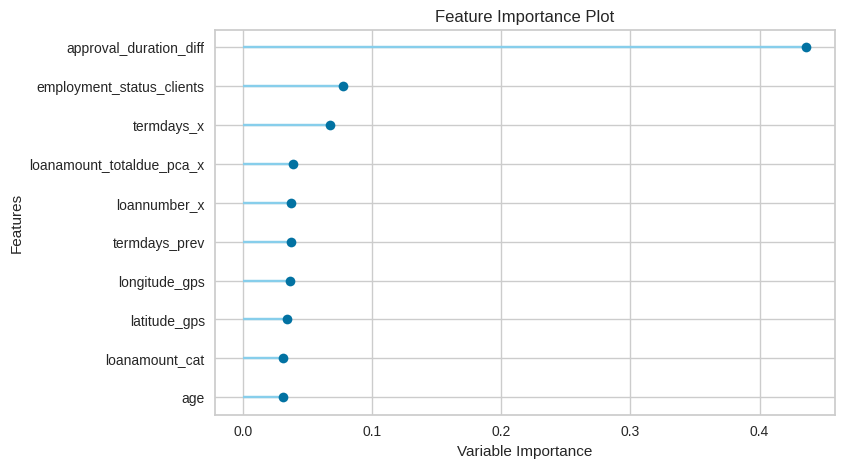

In [1085]:
plot_model(best_model_2, plot = 'feature')
# plot_model(lightgbm_2, plot = 'feature')


In [1086]:
# define tuning grid
dt_grid = {'max_depth' : [None, 2, 4, 6, 8, 10, 12,15,18,21]}

# tune model with custom grid and metric = logloss
best_model_2 = tune_model(best_model_2, custom_grid = dt_grid, optimize = 'logloss',fold=10, n_iter=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Log Loss
Fold,,,,,,,,
0,0.9645,0.9808,0.9645,0.9665,0.9642,0.9267,0.9292,0.5667
1,0.9573,0.9842,0.9573,0.9590,0.9571,0.9121,0.9142,0.6800
2,0.9621,0.9944,0.9621,0.9644,0.9618,0.9217,0.9246,0.6045
3,0.9573,0.9896,0.9573,0.9585,0.9571,0.9122,0.9138,0.6800
4,0.9834,0.9981,0.9834,0.9839,0.9834,0.9660,0.9665,0.2644
5,0.9715,0.9927,0.9715,0.9720,0.9714,0.9414,0.9422,0.4544
6,0.9691,0.9859,0.9691,0.9702,0.9690,0.9364,0.9378,0.4923
7,0.9739,0.9972,0.9739,0.9750,0.9738,0.9463,0.9477,0.4165
8,0.9786,0.9962,0.9786,0.9794,0.9785,0.9561,0.9570,0.3408


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 5 candidates, totalling 50 fits


In [1087]:
final_model_2 = finalize_model(best_model_2)
save_model(final_model_2, 'final_model_2')


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['longitude_gps', 'latitude_gps',
                                              'employment_status_clients',
                                              'loannumber_x', 'termdays_x',
                                              'systemloanid_prev',
                                              'loannumber_prev', 'termdays_prev'...
                                importance_type=None,
                                interaction_constraints=None, learning_rate=None,
                                max_bin=None, max_cat_threshold=None,
                                max_cat_to_onehot=None, max_delta_step=None,
                

# Model selection for cluster 3

In [1088]:
cluster_3 = pd.read_csv("/content/cluster3.csv")

In [1089]:
# prompt: drop the cluster column

# cluster_3.drop(columns=['cluster'], axis=1, inplace=True)


In [1090]:
from pycaret.classification import *

assign = setup(data = cluster_3, target = 'good_bad_flag', session_id=42)

from sklearn.metrics import log_loss
add_metric('logloss', 'Log Loss', log_loss, greater_is_better = False)

,Description,Value
0,Session id,42
1,Target,good_bad_flag
2,Target type,Binary
3,Target mapping,"-1.0: 0, 1.0: 1"
4,Original data shape,"(11690, 23)"
5,Transformed data shape,"(11690, 23)"
6,Transformed train set shape,"(8182, 23)"
7,Transformed test set shape,"(3508, 23)"
8,Numeric features,22
9,Preprocess,True


Name                                                          Log Loss
Display Name                                                  Log Loss
Score Function       <pycaret.internal.metrics.EncodedDecodedLabels...
Scorer               make_scorer(log_loss, greater_is_better=False,...
Target                                                            pred
Args                                                                {}
Greater is Better                                                False
Multiclass                                                        True
Custom                                                            True
Name: logloss, dtype: object

In [ ]:
best = compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,10:58:55
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Light Gradient Boosting Machine


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Log Loss,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9089,0.9665,0.9089,0.9148,0.9093,0.8172,0.8218,1.4516,0.2900
et,Extra Trees Classifier,0.8982,0.9532,0.8982,0.9095,0.8986,0.7969,0.8062,1.6231,0.9820
rf,Random Forest Classifier,0.8939,0.9559,0.8939,0.9086,0.8943,0.7890,0.8013,1.6913,1.9890
gbc,Gradient Boosting Classifier,0.8803,0.9394,0.8803,0.8946,0.8808,0.7620,0.7735,1.9076,3.5750
ada,Ada Boost Classifier,0.8701,0.9254,0.8701,0.8854,0.8706,0.7418,0.7541,2.0713,0.7020
dt,Decision Tree Classifier,0.8481,0.8446,0.8481,0.8482,0.8479,0.6902,0.6905,2.4220,0.2040
nb,Naive Bayes,0.7380,0.8404,0.7380,0.7891,0.7350,0.4927,0.5301,4.1775,0.0480
lr,Logistic Regression,0.7251,0.7676,0.7251,0.7350,0.7263,0.4508,0.4555,4.3822,0.0660
lda,Linear Discriminant Analysis,0.7194,0.7653,0.7194,0.7317,0.7205,0.4411,0.4473,4.4737,0.0870
ridge,Ridge Classifier,0.7188,0.7653,0.7188,0.7307,0.7199,0.4396,0.4456,4.4835,0.1030


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
best_model_3 = create_model(best)
# lightgbm_2 = create_model('lightgbm')

In [ ]:
plot_model(best_model_3, plot = 'feature')
# plot_model(lightgbm_2, plot = 'feature')


In [ ]:
# define tuning grid
dt_grid = {'max_depth' : [None, 2, 4, 6, 8, 10, 12,15,18,21]}

# tune model with custom grid and metric = logloss
best_model_3 = tune_model(best_model_3, custom_grid = dt_grid, optimize = 'logloss',fold=10, n_iter=5)

In [ ]:
final_model_3 = finalize_model(best_model_3)
save_model(final_model_3, 'final_model_3')


# Model Training

In [667]:
df_balanced_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22254 entries, 0 to 22253
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   longitude_gps                 22254 non-null  float64
 1   latitude_gps                  22254 non-null  float64
 2   employment_status_clients     22254 non-null  float64
 3   loannumber_x                  22254 non-null  float64
 4   termdays_x                    22254 non-null  float64
 5   systemloanid_prev             22254 non-null  float64
 6   loannumber_prev               22254 non-null  float64
 7   termdays_prev                 22254 non-null  float64
 8   loan_number_diff              22254 non-null  float64
 9   loan_amount_diff              22254 non-null  float64
 10  termdays_diff                 22254 non-null  float64
 11  age                           22254 non-null  float64
 12  approval_duration_diff        22254 non-null  float64
 13  d

In [668]:
# prompt: split the df_balanced_scaled into train and test sets
from sklearn.model_selection import train_test_split

X = df_balanced_scaled.drop(columns= ['good_bad_flag',], axis=1)

y = df_balanced_scaled['good_bad_flag']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=None, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=None ,stratify= df_balanced_scaled["loanamount_cat"],random_state= 42)


In [669]:
# prompt: create an ensemble model with 3 models

from sklearn.ensemble import VotingClassifier

# Define the individual models
model1 = final_model_1
model2 = final_model_2
# model3 = final_model_3


# Create the ensemble model
ensemble_model = VotingClassifier(estimators=[('model1', model1)], voting='soft')

# Train the ensemble model
ensemble_model.fit(X_train, y_train)


VotingClassifier(estimators=[('model1',
                              Pipeline(memory=Memory(location=None),
                                       steps=[('label_encoding',
                                               TransformerWrapperWithInverse(exclude=None,
                                                                             include=None,
                                                                             transformer=LabelEncoder())),
                                              ('numerical_imputer',
                                               TransformerWrapper(exclude=None,
                                                                  include=['longitude_gps',
                                                                           'latitude_gps',
                                                                           'employment_status_clients',
                                                                           'loannumber_x',
                                                                           'termdays_x',
                                                                           'systemloanid_...
                                                             max_cat_threshold=None,
                                                             max_cat_to_onehot=None,
                                                             max_delta_step=None,
                                                             max_depth=12,
                                                             max_leaves=None,
                                                             min_child_weight=None,
                                                             missing=nan,
                                                             monotone_constraints=None,
                                                             multi_strategy=None,
                                                             n_estimators=None,
                                                             n_jobs=-1,
                                                             num_parallel_tree=None,
                                                             objective='binary:logistic', ...))],
                                       verbose=False))],
                 flatten_transform=True, n_jobs=None, verbose=False,
                 voting='soft', weights=None)

# Testing the model on test data

In [825]:
# prompt: import 3 csv files and combine them along the same column called 'customer id'

import pandas as pd
df1 = pd.read_csv('testdemographics.csv')
df2 = pd.read_csv('testperf.csv')
test_df3 = pd.read_csv('testprevloans.csv')

test_df = pd.merge(df1, df2, on='customerid')
test_df = pd.merge(test_df, test_df3, on='customerid')

In [826]:
customerid = test_df[['customerid']]

In [827]:
# prompt: remove the _y from the columns ending with a _y and replace it with _prev

test_df.rename(columns={col: col[:-2] + '_prev' if col.endswith('_y') else col for col in test_df.columns}, inplace=True)


In [828]:
test_df.head()

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients,systemloanid_x,...,loannumber_prev,approveddate_prev,creationdate_prev,loanamount_prev,totaldue_prev,termdays_prev,closeddate,referredby_prev,firstduedate,firstrepaiddate
0,8a858f305c8dd672015c93b1db645db4,1976-08-28 00:00:00.000000,Savings,5.296628,7.593965,Heritage Bank,NaN,Permanent,NaN,301992953,...,1,2017-06-11 13:15:09.000000,2017-06-11 12:14:02.000000,10000.0,13000.0,30,2017-07-12 17:23:46.000000,NaN,2017-07-13 00:00:00.000000,2017-07-12 17:13:36.000000
1,8a858fde56eb02280156eb6dafc128ac,1982-03-29 00:00:00.000000,Savings,6.354624,4.949031,First Bank,NaN,Self-Employed,NaN,301997095,...,10,2017-03-09 22:21:00.000000,2017-03-09 21:20:53.000000,40000.0,44800.0,30,2017-04-10 07:48:10.000000,NaN,2017-04-10 00:00:00.000000,2017-04-10 07:33:01.000000
2,8a858fde56eb02280156eb6dafc128ac,1982-03-29 00:00:00.000000,Savings,6.354624,4.949031,First Bank,NaN,Self-Employed,NaN,301997095,...,12,2017-05-16 18:17:15.000000,2017-05-16 17:17:08.000000,40000.0,44000.0,30,2017-06-15 16:08:33.000000,NaN,2017-06-15 00:00:00.000000,2017-06-15 15:58:24.000000
3,8a858fde56eb02280156eb6dafc128ac,1982-03-29 00:00:00.000000,Savings,6.354624,4.949031,First Bank,NaN,Self-Employed,NaN,301997095,...,7,2016-11-16 08:46:32.000000,2016-11-16 07:46:22.000000,30000.0,34400.0,30,2016-12-16 10:38:27.000000,NaN,2016-12-16 00:00:00.000000,2016-12-16 10:23:18.000000
4,8a858fde56eb02280156eb6dafc128ac,1982-03-29 00:00:00.000000,Savings,6.354624,4.949031,First Bank,NaN,Self-Employed,NaN,301997095,...,6,2016-11-05 08:43:39.000000,2016-11-05 07:43:29.000000,30000.0,32250.0,15,2016-11-16 08:44:19.000000,NaN,2016-11-21 00:00:00.000000,2016-11-16 08:29:10.000000


In [829]:
# prompt: check whether df2['loannumber'] is always greater than or equal to df3['loannumber']. incase it is not always greater, check how many times it is greater than or equal to

is_greater = test_df['loannumber_x'] > test_df['loannumber_prev']
always_greater = is_greater.all()
if always_greater:
  print("df2['loannumber'] is always greater than df3['loannumber']")
else:
  greater_count = is_greater.sum()
  print(f"df2['loannumber'] is greater than or equal to df3['loannumber'] {greater_count} times")


df2['loannumber'] is always greater than df3['loannumber']


In [830]:
# prompt: check by how much loannumber_x is greater than loannumber_y on average

diff = test_df['loannumber_x'] - test_df['loannumber_prev']
average_diff = diff.mean()
print(f"On average, loannumber_x is {average_diff} greater than loannumber_y")


On average, loannumber_x is 4.1551401869158875 greater than loannumber_y


In [831]:
test_df['loan_number_diff'] = test_df['loannumber_x'] - test_df['loannumber_prev']


In [832]:
# prompt: check whether loanamount_x  is always equal to loanamount_y

is_equal = test_df['loanamount_x'] >= test_df['loanamount_prev']
always_equal = is_equal.all()
if always_equal:
  print("df2['loanamount'] is always equal to df3['loanamount']")
else:
  equal_count = is_equal.sum()
  print(f"df2['loanamount'] is greater or equal to df3['loanamount'] {equal_count} times")


df2['loanamount'] is greater or equal to df3['loanamount'] 1549 times


In [833]:
# prompt: create a new column called same_loan_amount. a cell will have 1 if loanamount_x equals to loanamount_y or else it will have 0.

test_df['loan_amount_diff'] = test_df['loanamount_x'] - test_df['loanamount_prev']


In [834]:
# prompt: check if termdays_x is equal to termdays_y or how many times it is equal

is_equal = test_df['termdays_x'] >= test_df['termdays_prev']
always_equal = is_equal.all()
if always_equal:
  print("df2['termdays'] is always equal to df3['termdays']")
else:
  equal_count = is_equal.sum()
  print(f"df2['termdays'] is greater or equal to df3['termdays'] {equal_count} times")


df2['termdays'] is greater or equal to df3['termdays'] 1517 times


In [835]:
# prompt: create a new column called same_termdays. a cell will have 1 if termdays_x equals to termdays_y or else it will have 0.

test_df['termdays_diff'] = test_df['termdays_x'] - test_df['termdays_prev']


In [836]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1605 entries, 0 to 1604
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customerid                  1605 non-null   object 
 1   birthdate                   1605 non-null   object 
 2   bank_account_type           1605 non-null   object 
 3   longitude_gps               1605 non-null   float64
 4   latitude_gps                1605 non-null   float64
 5   bank_name_clients           1605 non-null   object 
 6   bank_branch_clients         18 non-null     object 
 7   employment_status_clients   1459 non-null   object 
 8   level_of_education_clients  385 non-null    object 
 9   systemloanid_x              1605 non-null   int64  
 10  loannumber_x                1605 non-null   int64  
 11  approveddate_x              1605 non-null   object 
 12  creationdate_x              1605 non-null   object 
 13  loanamount_x                1605 

In [837]:
# prompt: drop the bank_branch_clients, level_of_education_clients, referredby_y,  referredby_y columns from the dataframe permanently

test_df.drop(['bank_branch_clients', 'level_of_education_clients', ], axis=1, inplace=True)


In [838]:
# prompt: under the "employment_status_clients" column, replace empty cells ie those with Nan values with "unknown" of string datatype

test_df['employment_status_clients'].fillna('unknown', inplace=True)


In [839]:
# prompt: use the birthdate  column to calculate the age of each client

import datetime

test_df['birthdate'] = pd.to_datetime(test_df['birthdate'])
test_df['today'] = pd.to_datetime(datetime.date.today())
test_df['age'] = test_df['today'].dt.year - test_df['birthdate'].dt.year


# Drop the temporary 'today' column
test_df.drop('today', axis=1, inplace=True)


In [840]:
# prompt: drop the birthdate column

test_df.drop('birthdate', axis=1, inplace=True)


In [841]:
test_df['age'].head()

0    48
1    42
2    42
3    42
4    42
Name: age, dtype: int32

In [842]:
# prompt: drop customerid and systemloanid columns

test_df.drop(columns=['customerid','systemloanid_x',], inplace=True)


In [843]:
# prompt: convert approveddate and creationdate to datetime datatypes

# df['approveddate_x'] = pd.to_datetime(df['approveddate_x'])
# df['creationdate_x'] = pd.to_datetime(df['creationdate_x'])
# df['approveddate_prev'] = pd.to_datetime(df['approveddate_prev'])
# df['creationdate_prev'] = pd.to_datetime(df['creationdate_prev'])

In [844]:
test_df.head()

,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,employment_status_clients,loannumber_x,approveddate_x,creationdate_x,loanamount_x,totaldue_x,...,totaldue_prev,termdays_prev,closeddate,referredby_prev,firstduedate,firstrepaiddate,loan_number_diff,loan_amount_diff,termdays_diff,age
0,Savings,5.296628,7.593965,Heritage Bank,Permanent,2,36:45.0,36:38.0,10000,11500.0,...,13000.0,30,2017-07-12 17:23:46.000000,NaN,2017-07-13 00:00:00.000000,2017-07-12 17:13:36.000000,1,0.0,-15,48
1,Savings,6.354624,4.949031,First Bank,Self-Employed,14,31:11.0,30:01.0,40000,44000.0,...,44800.0,30,2017-04-10 07:48:10.000000,NaN,2017-04-10 00:00:00.000000,2017-04-10 07:33:01.000000,4,0.0,0,42
2,Savings,6.354624,4.949031,First Bank,Self-Employed,14,31:11.0,30:01.0,40000,44000.0,...,44000.0,30,2017-06-15 16:08:33.000000,NaN,2017-06-15 00:00:00.000000,2017-06-15 15:58:24.000000,2,0.0,0,42
3,Savings,6.354624,4.949031,First Bank,Self-Employed,14,31:11.0,30:01.0,40000,44000.0,...,34400.0,30,2016-12-16 10:38:27.000000,NaN,2016-12-16 00:00:00.000000,2016-12-16 10:23:18.000000,7,10000.0,0,42
4,Savings,6.354624,4.949031,First Bank,Self-Employed,14,31:11.0,30:01.0,40000,44000.0,...,32250.0,15,2016-11-16 08:44:19.000000,NaN,2016-11-21 00:00:00.000000,2016-11-16 08:29:10.000000,8,10000.0,15,42


In [845]:
# prompt: slice the first 2 values of  the strings in the columns: approveddate_x,  creationdate_x,  approveddate_prev, creationdate_prev then convert them into floats

test_df['approveddate_x'] = test_df['approveddate_x'].str[:2].astype(float)
test_df['creationdate_x'] = test_df['creationdate_x'].str[:2].astype(float)
test_df['approveddate_prev'] = pd.to_datetime(test_df['approveddate_prev'])
test_df['creationdate_prev'] = pd.to_datetime(test_df['creationdate_prev'])

In [846]:
# prompt: create a columm that measures the number of months it took to approve the loan. by subracting creationdate_x from approveddate_x

test_df['loan_approval_duration_x'] = (test_df['approveddate_x'] - test_df['creationdate_x'])
test_df['loan_approval_duration_prev'] = (test_df['approveddate_prev'] - test_df['creationdate_prev'])

In [847]:
# prompt: use the loan_approval_duration_x and loan_approval_duration_y columns to extract only the number of hours and convert them to integers

test_df['loan_approval_duration_x'] = test_df['loan_approval_duration_x'] /24
test_df['loan_approval_duration_x'] = test_df['loan_approval_duration_x'].astype(float)

test_df['loan_approval_duration_prev'] = test_df['loan_approval_duration_prev'] / pd.Timedelta('1 day')
test_df['loan_approval_duration_prev'] = test_df['loan_approval_duration_prev'].astype(float)


In [848]:
test_df['approval_duration_diff'] = test_df['loan_approval_duration_x'] - test_df['loan_approval_duration_prev']

In [849]:
test_df['loan_approval_duration_prev'].head()

0    0.042442
1    0.041748
2    0.041748
3    0.041782
4    0.041782
Name: loan_approval_duration_prev, dtype: float64

In [850]:
# prompt: drop the approveddate and creationdate columns

test_df.drop(columns=['approveddate_x', 'creationdate_x', 'approveddate_prev', 'creationdate_prev','loan_approval_duration_x','loan_approval_duration_prev'], inplace=True)


In [851]:
# prompt: convert firstduedate and firstrepaiddate to datetime datatypes and subtract the former from the latter

test_df['firstduedate'] = pd.to_datetime(test_df['firstduedate'])
test_df['firstrepaiddate'] = pd.to_datetime(test_df['firstrepaiddate'])
test_df['delay_duration'] = test_df['firstrepaiddate'] - test_df['firstduedate']


In [852]:
# prompt: convert delay duration to hours to days
# . use the float datatype.

test_df['delay_duration'] = test_df['delay_duration'] / pd.Timedelta('1 day')
test_df['delay_duration'] = test_df['delay_duration'].astype(float)


In [853]:
test_df['delay_duration'].value_counts()

delay_duration
 1.000000    4
 0.000000    4
 4.000000    3
-1.000000    2
 0.522928    2
            ..
-3.503912    1
-0.374433    1
-4.295127    1
-1.500220    1
-0.100868    1
Name: count, Length: 1592, dtype: int64

In [854]:
# prompt: convert closeddate and creationdate from the df3 dataframe to datetime datatype

test_df3['closeddate'] = pd.to_datetime(test_df3['closeddate'])
test_df3['creationdate'] = pd.to_datetime(test_df3['creationdate'])


In [855]:
# prompt: create a loan duration column in the df dataframe using closeddate and creationdate from the df3 dataframe

test_df['actual_loan_duration'] = test_df3['closeddate'] - test_df3['creationdate']


In [856]:
# prompt: convert the actual_loan_duration to days and convert the hours to days. use the float datatype

test_df['actual_loan_duration'] = test_df['actual_loan_duration'] / pd.Timedelta('1 day')
test_df['actual_loan_duration'] = test_df['actual_loan_duration'].astype(float)

In [857]:
test_df['defaulted_days'] = test_df['termdays_x'] - test_df['actual_loan_duration']

In [858]:
# test_df['loan_number_diff'] = test_df['loannumber_x'] - test_df['loannumber_prev']
# test_df['loan_amount_diff'] = test_df['loanamount_x'] - test_df['loanamount_prev']
# test_df['termdays_diff'] = test_df['termdays_x'] - test_df['termdays_prev']
# test_df['approval_duration_diff'] = test_df['loan_approval_duration_x'] - test_df['loan_approval_duration_prev']
# test_df['defaulted_days'] = test_df['termdays_x'] - test_df['actual_loan_duration']

In [859]:
test_df['actual_loan_duration'].value_counts()

actual_loan_duration
15.080799    2
26.044641    2
30.602315    1
27.186840    1
14.606597    1
            ..
25.049444    1
25.027002    1
2.006389     1
36.262234    1
40.118495    1
Name: count, Length: 1603, dtype: int64

In [860]:
# prompt: drop closeddate, firstduedate, firstrepaiddate

test_df.drop(columns=['closeddate', 'firstduedate', 'firstrepaiddate'], inplace=True)


In [861]:
# prompt: replace nan values in the employement _status_clients with "unknown"

test_df['employment_status_clients'].fillna('unknown', inplace=True)


In [862]:
test_df['employment_status_clients'].value_counts()

employment_status_clients
Permanent        1044
Self-Employed     294
unknown           146
Student            97
Unemployed         20
Retired             4
Name: count, dtype: int64

In [863]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder


# Define the order of categories (most to least viable)
categories = [["Permanent", "Self-Employed", "Contract", "Retired", "Student", "Unemployed", "unknown"]]

# Create the OrdinalEncoder object
encoder = OrdinalEncoder(categories=categories)

# Encode the employment status column
test_df['employment_status_clients'] = encoder.fit_transform(test_df[['employment_status_clients']])


In [864]:
test_df['employment_status_clients'].value_counts()

employment_status_clients
0.0    1044
1.0     294
6.0     146
4.0      97
5.0      20
3.0       4
Name: count, dtype: int64

In [865]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1605 entries, 0 to 1604
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   bank_account_type          1605 non-null   object 
 1   longitude_gps              1605 non-null   float64
 2   latitude_gps               1605 non-null   float64
 3   bank_name_clients          1605 non-null   object 
 4   employment_status_clients  1605 non-null   float64
 5   loannumber_x               1605 non-null   int64  
 6   loanamount_x               1605 non-null   int64  
 7   totaldue_x                 1605 non-null   float64
 8   termdays_x                 1605 non-null   int64  
 9   referredby_x               83 non-null     object 
 10  systemloanid_prev          1605 non-null   int64  
 11  loannumber_prev            1605 non-null   int64  
 12  loanamount_prev            1605 non-null   float64
 13  totaldue_prev              1605 non-null   float

In [866]:
# prompt: for refferedby_x and refferedby_y columns, replace empty cells with zero and the contents of the other cells with 1

test_df['referredby_x'].fillna(0, inplace=True)
test_df['referredby_prev'].fillna(0, inplace=True)
test_df.loc[test_df['referredby_x'] != 0, 'referredby_x'] = 1
test_df.loc[test_df['referredby_prev'] != 0, 'referredby_prev'] = 1


In [867]:
# prompt: checked whether referredby_x is always equal to referredby_y

is_equal = test_df['referredby_x'] == test_df['referredby_prev']
always_equal = is_equal.all()
if always_equal:
  print("df2['referredby'] is always equal to df3['referredby']")
else:
  equal_count = is_equal.sum()
  print(f"df2['referredby'] is equal to df3['referredby'] {equal_count} times")


df2['referredby'] is always equal to df3['referredby']


In [868]:
# prompt: drop referredby_y

test_df.drop('referredby_prev', axis=1, inplace=True)


In [869]:
# prompt: change referredby_x to integer

test_df['referredby_x'] = test_df['referredby_x'].astype('int')


In [870]:
test_df['referredby_x'].value_counts()

referredby_x
0    1522
1      83
Name: count, dtype: int64

In [871]:
# import pandas as pd
# from sklearn.preprocessing import  LabelEncoder


# # Initialize LabelEncoders
# label_encoder_acc_type = LabelEncoder()
# label_encoder_bank_name = LabelEncoder()

# Fit and transform each column separately
# test_df['bank_account_type'] = label_encoder_acc_type.fit_transform(test_df[['bank_account_type']])
# test_df['bank_name_clients'] = label_encoder_bank_name.fit_transform(test_df[['bank_name_clients']])



In [872]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1605 entries, 0 to 1604
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   bank_account_type          1605 non-null   object 
 1   longitude_gps              1605 non-null   float64
 2   latitude_gps               1605 non-null   float64
 3   bank_name_clients          1605 non-null   object 
 4   employment_status_clients  1605 non-null   float64
 5   loannumber_x               1605 non-null   int64  
 6   loanamount_x               1605 non-null   int64  
 7   totaldue_x                 1605 non-null   float64
 8   termdays_x                 1605 non-null   int64  
 9   referredby_x               1605 non-null   int64  
 10  systemloanid_prev          1605 non-null   int64  
 11  loannumber_prev            1605 non-null   int64  
 12  loanamount_prev            1605 non-null   float64
 13  totaldue_prev              1605 non-null   float

In [873]:
from sklearn.preprocessing import  TargetEncoder

# T_encoder = TargetEncoder(categories='auto', target_type='binary', smooth='auto', cv=5, shuffle=True, random_state=42)

# Fit and transform the data
test_encoded = T_encoder.transform(test_df[['bank_account_type', 'bank_name_clients']])

# Join the encoded columns back to the original DataFrame
# df = pd.concat([df.drop(['bank_account_type', 'bank_name_clients'], axis=1), df_encoded], axis=1)

test_encoded = pd.DataFrame(test_encoded, columns= ['bank_account_type_enc', 'bank_name_clients_enc'])
test_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1605 entries, 0 to 1604
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   bank_account_type_enc  1605 non-null   float64
 1   bank_name_clients_enc  1605 non-null   float64
dtypes: float64(2)
memory usage: 25.2 KB


In [874]:
test_df["bank_account_type_enc"] = test_encoded["bank_account_type_enc"]
test_df["bank_name_clients_enc"] = test_encoded["bank_name_clients_enc"]


In [875]:
test_df.drop(columns= ['bank_account_type', "bank_name_clients", ], inplace = True)

In [876]:
# prompt: check for percentage of missing values

test_df.isnull().mean() * 100

longitude_gps                0.0
latitude_gps                 0.0
employment_status_clients    0.0
loannumber_x                 0.0
loanamount_x                 0.0
totaldue_x                   0.0
termdays_x                   0.0
referredby_x                 0.0
systemloanid_prev            0.0
loannumber_prev              0.0
loanamount_prev              0.0
totaldue_prev                0.0
termdays_prev                0.0
loan_number_diff             0.0
loan_amount_diff             0.0
termdays_diff                0.0
age                          0.0
approval_duration_diff       0.0
delay_duration               0.0
actual_loan_duration         0.0
defaulted_days               0.0
bank_account_type_enc        0.0
bank_name_clients_enc        0.0
dtype: float64

In [877]:
test_df["loanamount_cat"] = pd.cut(test_df["loanamount_x"],
                              bins = [0,10000,20000,30000,40000,np.inf],
                              labels = [1,2,3,4,5])

# Scaling test data and PCA

In [878]:
# prompt: scale data using standard scaler

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Scale the data without the target column

test_df_scaled = scaler.fit_transform(test_df)

# Add the target column back to the dataframe
test_df_scaled = pd.DataFrame(data=test_df_scaled, columns= test_df.columns)
test_df_scaled.head()


,longitude_gps,latitude_gps,employment_status_clients,loannumber_x,loanamount_x,totaldue_x,termdays_x,referredby_x,systemloanid_prev,loannumber_prev,...,loan_amount_diff,termdays_diff,age,approval_duration_diff,delay_duration,actual_loan_duration,defaulted_days,bank_account_type_enc,bank_name_clients_enc,loanamount_cat
0,0.162118,0.028115,-0.542675,-1.494095,-1.217691,-1.318772,-1.429962,-0.233524,1.024944,-0.982769,...,-0.864177,-1.597603,1.309796,0.058486,0.108683,0.546429,-1.376941,0.757608,-0.97614,-1.248348
1,0.274427,-0.480832,-0.021122,1.346322,1.270399,1.179491,-0.131835,-0.233524,-0.036750,1.818908,...,-0.864177,-0.419224,0.392996,0.225231,0.164553,0.156578,-0.204073,0.757608,0.05978,1.228288
2,0.274427,-0.480832,-0.021122,1.346322,1.270399,1.179491,-0.131835,-0.233524,0.762614,2.441502,...,-0.864177,-0.419224,0.392996,0.225231,0.197408,0.385843,-0.370572,0.757608,0.05978,1.228288
3,0.274427,-0.480832,-0.021122,1.346322,1.270399,1.179491,-0.131835,-0.233524,-0.837125,0.885015,...,0.133022,-0.419224,0.392996,0.225094,0.175623,0.654175,-0.565443,0.757608,0.05978,1.228288
4,0.274427,-0.480832,-0.021122,1.346322,1.270399,1.179491,-0.131835,-0.233524,-0.892111,0.573718,...,0.133022,0.759155,0.392996,0.225094,-0.299863,-0.592366,0.339835,0.757608,0.05978,1.228288


In [879]:
# # prompt: scale the df_balanced dataframe  using the minmax scaler without removing or scaling the target column

# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler(feature_range=(0, 1))

# # Scale the data without the target column
# test_df_scaled = scaler.fit_transform(test_df)

# # Add the target column back to the dataframe
# test_df_scaled = pd.DataFrame(data=test_df_scaled, columns=test_df.columns)

# test_df_scaled.head()


In [880]:
# prompt: create a new feature from loanamount and totaldue using the concept of PCA

from sklearn.decomposition import PCA

pca = PCA(n_components=1)
test_df_scaled['loanamount_totaldue_pca_x'] = pca.fit_transform(test_df_scaled[['loanamount_x', 'totaldue_x']])
test_df_scaled['loanamount_totaldue_pca_prev'] = pca.fit_transform(test_df_scaled[['loanamount_prev', 'totaldue_prev']])

test_df_scaled.head()


,longitude_gps,latitude_gps,employment_status_clients,loannumber_x,loanamount_x,totaldue_x,termdays_x,referredby_x,systemloanid_prev,loannumber_prev,...,age,approval_duration_diff,delay_duration,actual_loan_duration,defaulted_days,bank_account_type_enc,bank_name_clients_enc,loanamount_cat,loanamount_totaldue_pca_x,loanamount_totaldue_pca_prev
0,0.162118,0.028115,-0.542675,-1.494095,-1.217691,-1.318772,-1.429962,-0.233524,1.024944,-0.982769,...,1.309796,0.058486,0.108683,0.546429,-1.376941,0.757608,-0.97614,-1.248348,-1.793550,-0.906927
1,0.274427,-0.480832,-0.021122,1.346322,1.270399,1.179491,-0.131835,-0.233524,-0.036750,1.818908,...,0.392996,0.225231,0.164553,0.156578,-0.204073,0.757608,0.05978,1.228288,1.732333,3.746405
2,0.274427,-0.480832,-0.021122,1.346322,1.270399,1.179491,-0.131835,-0.233524,0.762614,2.441502,...,0.392996,0.225231,0.197408,0.385843,-0.370572,0.757608,0.05978,1.228288,1.732333,3.689155
3,0.274427,-0.480832,-0.021122,1.346322,1.270399,1.179491,-0.131835,-0.233524,-0.837125,0.885015,...,0.392996,0.225094,0.175623,0.654175,-0.565443,0.757608,0.05978,1.228288,1.732333,2.209607
4,0.274427,-0.480832,-0.021122,1.346322,1.270399,1.179491,-0.131835,-0.233524,-0.892111,0.573718,...,0.392996,0.225094,-0.299863,-0.592366,0.339835,0.757608,0.05978,1.228288,1.732333,2.055747


In [881]:
# prompt: drop loanamount and totaldue columns

test_df_scaled.drop(columns=['loanamount_x','loanamount_prev', 'totaldue_x', 'totaldue_prev',], inplace=True)


In [882]:
test_duplicates = test_df_scaled[test_df_scaled.duplicated()]
test_duplicates

,longitude_gps,latitude_gps,employment_status_clients,loannumber_x,termdays_x,referredby_x,systemloanid_prev,loannumber_prev,termdays_prev,loan_number_diff,...,age,approval_duration_diff,delay_duration,actual_loan_duration,defaulted_days,bank_account_type_enc,bank_name_clients_enc,loanamount_cat,loanamount_totaldue_pca_x,loanamount_totaldue_pca_prev


In [883]:
test_df_scaled.drop('referredby_x', axis= 1, inplace= True)

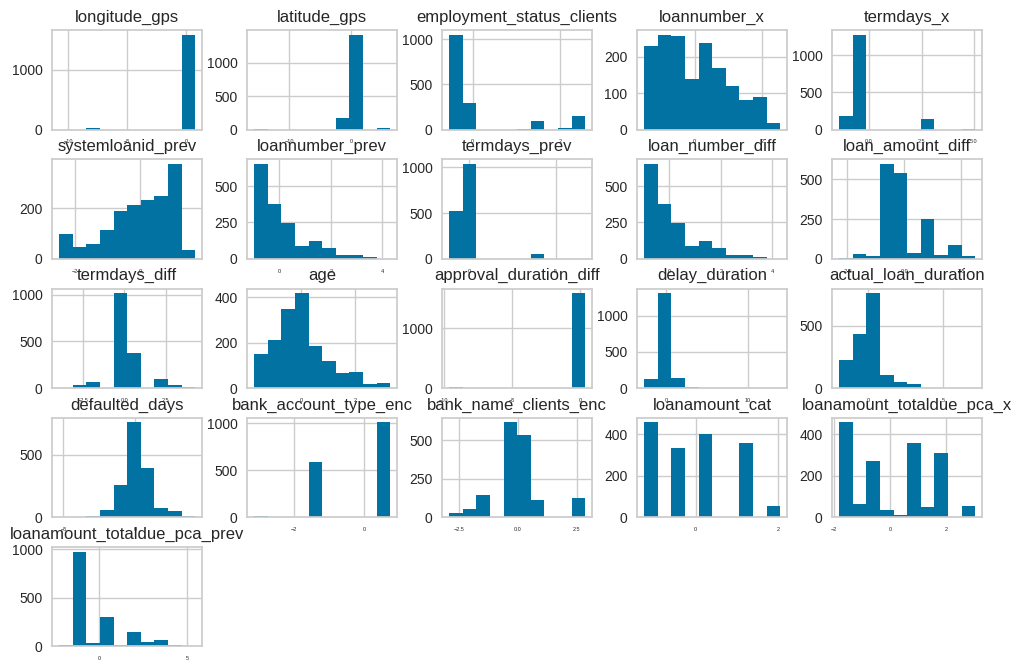

In [884]:
import matplotlib.pyplot as plt

test_df_scaled.hist(figsize=(12,8), xlabelsize= 4)
plt.show()

In [885]:
import numpy as np
import pandas as pd

# Define the list of columns for log transformation, ensuring no duplicates
log_cols = [
    'bank_account_type_enc', 'actual_loan_duration', 'delay_duration',
    'employment_status_clients', 'loannumber_prev','loannumber_x', 'termdays_x',
    'termdays_prev','latitude_gps', 'longitude_gps', 'loan_number_diff', 'loan_amount_diff','termdays_diff', 'approval_duration_diff'
]



# Ensure that all columns in log_cols exist in the DataFrame
existing_log_cols = [col for col in log_cols if col in test_df_scaled.columns]


# non_positive_counts = (df_balanced_scaled[existing_log_cols] <= 0).sum()
# if non_positive_counts.any():
#     print("Non-positive values found in columns:")
#     print(non_positive_counts[non_positive_counts > 0])
#     # Decide how to handle non-positive values
#     # For now, let's replace any remaining non-positive values with a small number
#     df_balanced_scaled[existing_log_cols] = df_balanced_scaled[existing_log_cols].clip(lower=1e-6)


# Replace 0 values with a small number (1e-6) to avoid log(0)
# test_df_scaled[existing_log_cols] = test_df_scaled[existing_log_cols].replace(0, 1e-6)

# Apply log transformation to the specified columns
for col in existing_log_cols:
    test_df_scaled[col] = test_df_scaled[col].apply(lambda x: np.sign(x) * np.log(np.abs(x) + 1))


In [886]:
test_df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1605 entries, 0 to 1604
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   longitude_gps                 1605 non-null   float64
 1   latitude_gps                  1605 non-null   float64
 2   employment_status_clients     1605 non-null   float64
 3   loannumber_x                  1605 non-null   float64
 4   termdays_x                    1605 non-null   float64
 5   systemloanid_prev             1605 non-null   float64
 6   loannumber_prev               1605 non-null   float64
 7   termdays_prev                 1605 non-null   float64
 8   loan_number_diff              1605 non-null   float64
 9   loan_amount_diff              1605 non-null   float64
 10  termdays_diff                 1605 non-null   float64
 11  age                           1605 non-null   float64
 12  approval_duration_diff        1605 non-null   float64
 13  del

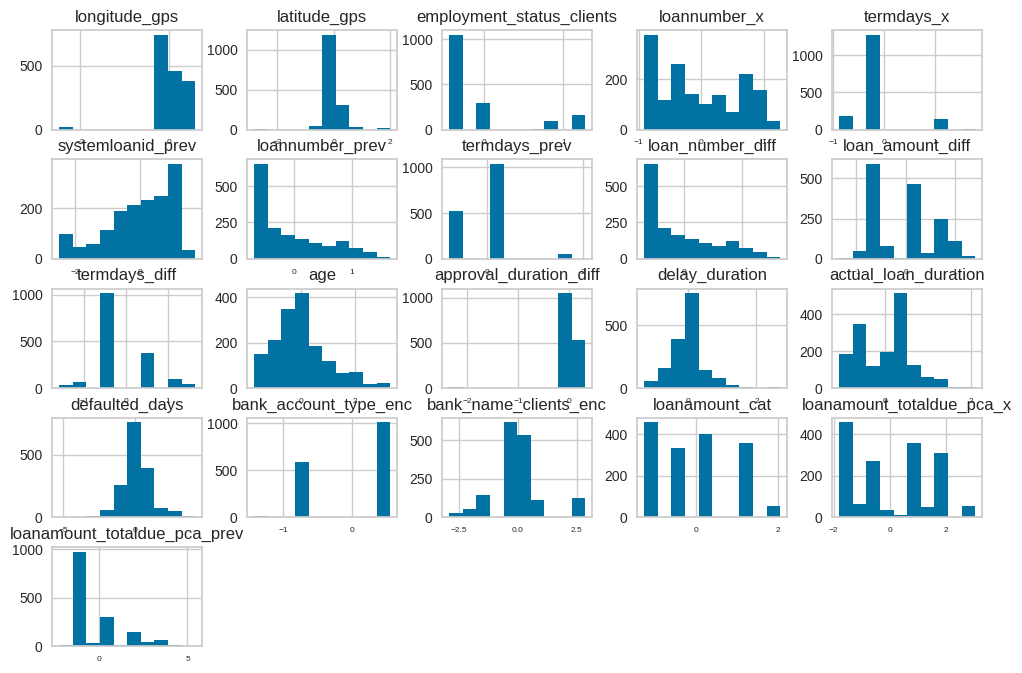

In [887]:
import matplotlib.pyplot as plt

test_df_scaled.hist(figsize=(12,8), xlabelsize= 6)
plt.show()

In [888]:
test_df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1605 entries, 0 to 1604
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   longitude_gps                 1605 non-null   float64
 1   latitude_gps                  1605 non-null   float64
 2   employment_status_clients     1605 non-null   float64
 3   loannumber_x                  1605 non-null   float64
 4   termdays_x                    1605 non-null   float64
 5   systemloanid_prev             1605 non-null   float64
 6   loannumber_prev               1605 non-null   float64
 7   termdays_prev                 1605 non-null   float64
 8   loan_number_diff              1605 non-null   float64
 9   loan_amount_diff              1605 non-null   float64
 10  termdays_diff                 1605 non-null   float64
 11  age                           1605 non-null   float64
 12  approval_duration_diff        1605 non-null   float64
 13  del

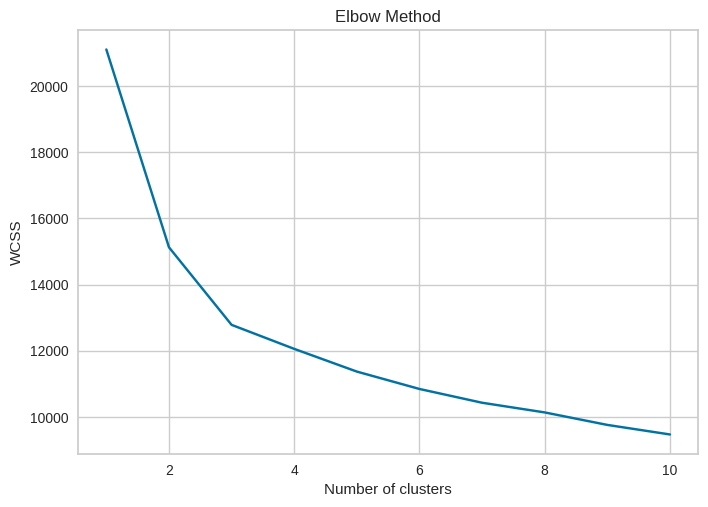

In [889]:
# prompt: use k-means and elbow method to cluster the data
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    test_kmeans = KMeans(n_clusters=i, n_init=10, random_state=0)
    test_kmeans.fit(test_df_scaled)
    wcss.append(test_kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


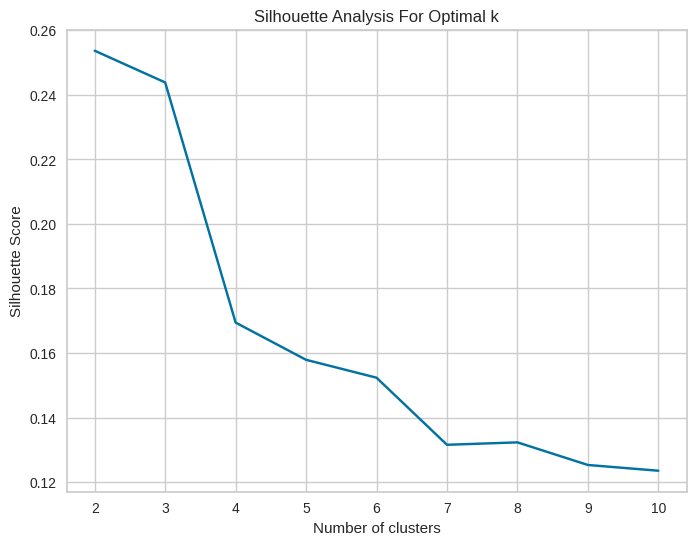

In [890]:
from sklearn.metrics import silhouette_score

def plot_silhouette_analysis(data):
    silhouette_scores = []
    K = range(2, 11)  # Silhouette score requires at least 2 clusters
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42).fit(data)
        score = silhouette_score(data, kmeans.labels_)
        silhouette_scores.append(score)

    plt.figure(figsize=(8, 6))
    plt.plot(K, silhouette_scores, 'bx-')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Analysis For Optimal k')
    plt.show()

# Assuming X_scaled is your scaled feature data
plot_silhouette_analysis(test_df_scaled)


In [891]:
kmeans = KMeans(n_clusters=2, n_init=10, random_state=0)
test_df_scaled['cluster'] = kmeans.fit_predict(test_df_scaled)
test_df_scaled.head()

,longitude_gps,latitude_gps,employment_status_clients,loannumber_x,termdays_x,systemloanid_prev,loannumber_prev,termdays_prev,loan_number_diff,loan_amount_diff,...,approval_duration_diff,delay_duration,actual_loan_duration,defaulted_days,bank_account_type_enc,bank_name_clients_enc,loanamount_cat,loanamount_totaldue_pca_x,loanamount_totaldue_pca_prev,cluster
0,0.150244,0.027727,-0.433518,-0.913926,-0.887876,1.024944,-0.684494,0.33779,-0.684291,-0.622820,...,0.056840,0.103173,0.435948,-1.376941,0.563954,-0.97614,-1.248348,-1.793550,-0.906927,0
1,0.242497,-0.392604,-0.020902,0.852849,-0.123840,-0.036750,1.036349,0.33779,-0.047173,-0.622820,...,0.203129,0.152337,0.145466,-0.204073,0.563954,0.05978,1.228288,1.732333,3.746405,1
2,0.242497,-0.392604,-0.020902,0.852849,-0.123840,0.762614,1.235908,0.33779,-0.513430,-0.622820,...,0.203129,0.180159,0.326309,-0.370572,0.563954,0.05978,1.228288,1.732333,3.689155,1
3,0.242497,-0.392604,-0.020902,0.852849,-0.123840,-0.837125,0.633936,0.33779,0.634331,0.124888,...,0.203018,0.161798,0.503302,-0.565443,0.563954,0.05978,1.228288,1.732333,2.209607,1
4,0.242497,-0.392604,-0.020902,0.852849,-0.123840,-0.892111,0.453441,-0.77884,0.787145,0.124888,...,0.203018,-0.262259,-0.465221,0.339835,0.563954,0.05978,1.228288,1.732333,2.055747,1


# After evaluation

In [892]:
predictions = ensemble_model.predict(test_df_scaled)

In [893]:
# prompt: convert predictions into a dataframe

predictions_df = pd.DataFrame(predictions, columns=['Good_Bad_flag'])


In [894]:
# prompt: replace all the -1 under the Good_bad_flag column of predictions_df dataframe with zero permanently

predictions_df['Good_Bad_flag'] = predictions_df['Good_Bad_flag'].replace(-1, 0)


In [895]:
predictions_df.value_counts()

Good_Bad_flag
1.0              1588
0.0                17
Name: count, dtype: int64

In [896]:
duplicates = test_df_scaled[test_df_scaled.duplicated()]
duplicates

,longitude_gps,latitude_gps,employment_status_clients,loannumber_x,termdays_x,systemloanid_prev,loannumber_prev,termdays_prev,loan_number_diff,loan_amount_diff,...,approval_duration_diff,delay_duration,actual_loan_duration,defaulted_days,bank_account_type_enc,bank_name_clients_enc,loanamount_cat,loanamount_totaldue_pca_x,loanamount_totaldue_pca_prev,cluster


In [897]:
# prompt: concatenate customer id to the front the predicions_df
import numpy as np

final_predictions = pd.concat((customerid, predictions_df), axis=1)
final_predictions


,customerid,Good_Bad_flag
0,8a858f305c8dd672015c93b1db645db4,1.0
1,8a858fde56eb02280156eb6dafc128ac,1.0
2,8a858fde56eb02280156eb6dafc128ac,1.0
3,8a858fde56eb02280156eb6dafc128ac,1.0
4,8a858fde56eb02280156eb6dafc128ac,1.0
...,...,...
1600,8a858e675b00c831015b06776ce75e69,1.0
1601,8a858e675b00c831015b06776ce75e69,1.0
1602,8a858e675b00c831015b06776ce75e69,1.0
1603,8a858e675b00c831015b06776ce75e69,1.0


# Create submission file

In [898]:
final_predictions = pd.DataFrame(final_predictions, columns=['customerid', 'Good_Bad_flag'])


In [899]:
sample_df = pd.read_csv("/content/SampleSubmission.csv")
sample_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerid     1450 non-null   object
 1   Good_Bad_flag  1450 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 22.8+ KB


In [900]:
# prompt: concatenate submit_df and sample_df

final_submission = pd.concat([sample_df, final_predictions], axis=0)
final_submission.to_csv("submit_42.csv", index= False)

In [901]:
final_predictions.value_counts()

customerid                        Good_Bad_flag
8a8588d653a915270153ab10232e304f  1.0              18
8a858f03582604ff01582a09d5a32c12  1.0              16
8a858e17562dc2270156312c4a755edc  1.0              15
8a85896653f0fed20154065bbe063ff7  1.0              15
8a858f0056b7cf8e0156b8918d424613  1.0              15
                                                   ..
8a858f105a4ed440015a51ffebd57187  1.0               1
8a858f115cea8545015cee54a7486425  1.0               1
8a858f1f5c834d4f015c872619d66fd2  1.0               1
8a858f235b8bf5bc015b8bfee8ee084c  1.0               1
8aab10f748cf78ff0148d11fac1447a6  1.0               1
Name: count, Length: 396, dtype: int64

In [902]:
test_df.head()

,longitude_gps,latitude_gps,employment_status_clients,loannumber_x,loanamount_x,totaldue_x,termdays_x,referredby_x,systemloanid_prev,loannumber_prev,...,loan_amount_diff,termdays_diff,age,approval_duration_diff,delay_duration,actual_loan_duration,defaulted_days,bank_account_type_enc,bank_name_clients_enc,loanamount_cat
0,5.296628,7.593965,0.0,2,10000,11500.0,15,0,301934783,1,...,0.0,-15,48,-0.042442,-0.282222,30.602315,-15.602315,0.221078,0.138353,1
1,6.354624,4.949031,1.0,14,40000,44000.0,30,0,301835093,10,...,0.0,0,42,-0.000081,0.314595,25.829236,4.170764,0.221078,0.187887,4
2,6.354624,4.949031,1.0,14,40000,44000.0,30,0,301910151,12,...,0.0,0,42,-0.000081,0.665556,28.636204,1.363796,0.221078,0.187887,4
3,6.354624,4.949031,1.0,14,40000,44000.0,30,0,301759940,7,...,10000.0,0,42,-0.000116,0.432847,31.921481,-1.921481,0.221078,0.187887,4
4,6.354624,4.949031,1.0,14,40000,44000.0,30,0,301754777,6,...,10000.0,15,42,-0.000116,-4.646412,16.659653,13.340347,0.221078,0.187887,4


make changes by removing the cluster column and see what happens